In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math

In [2]:
df_article = pd.read_csv('./data/list_article.csv').sort_values(by='count', ascending=False)

df_levels = pd.read_csv('./data/list_levels.csv')#.sort_values(by='count', ascending=False)
df_tags = pd.read_csv('./data/list_tags.csv')#.sort_values(by='count', ascending=False)
df_attr = pd.read_csv('./data/list_attr_val.csv')#.sort_values(by='count', ascending=False)

FileNotFoundError: [Errno 2] No such file or directory: './data/list_article.csv'

# Type of articles

In [3]:
df_article

article   count
0        research-article  385174
1          review-article   19310
2            brief-report    4476
5             case-report    2055
8                   other    1869
16      systematic-review    1436
4                abstract    1100
10             data-paper     688
9                protocol     544
12        methods-article     527
15                 letter     409
6         chapter-article     270
17                 report     240
14              editorial     238
3          product-review     205
7              discussion     173
18     article-commentary     119
13         meeting-report      84
19    rapid-communication      39
22                   news      23
11               calendar      13
21             correction      12
27            book-review      10
29               in-brief       6
23           introduction       5
26               addendum       5
24           announcement       4
28               obituary       2
20                    NaN       1
25        review-article        1
30  expression-of-concern       1
31             retraction       1
32                  reply       1

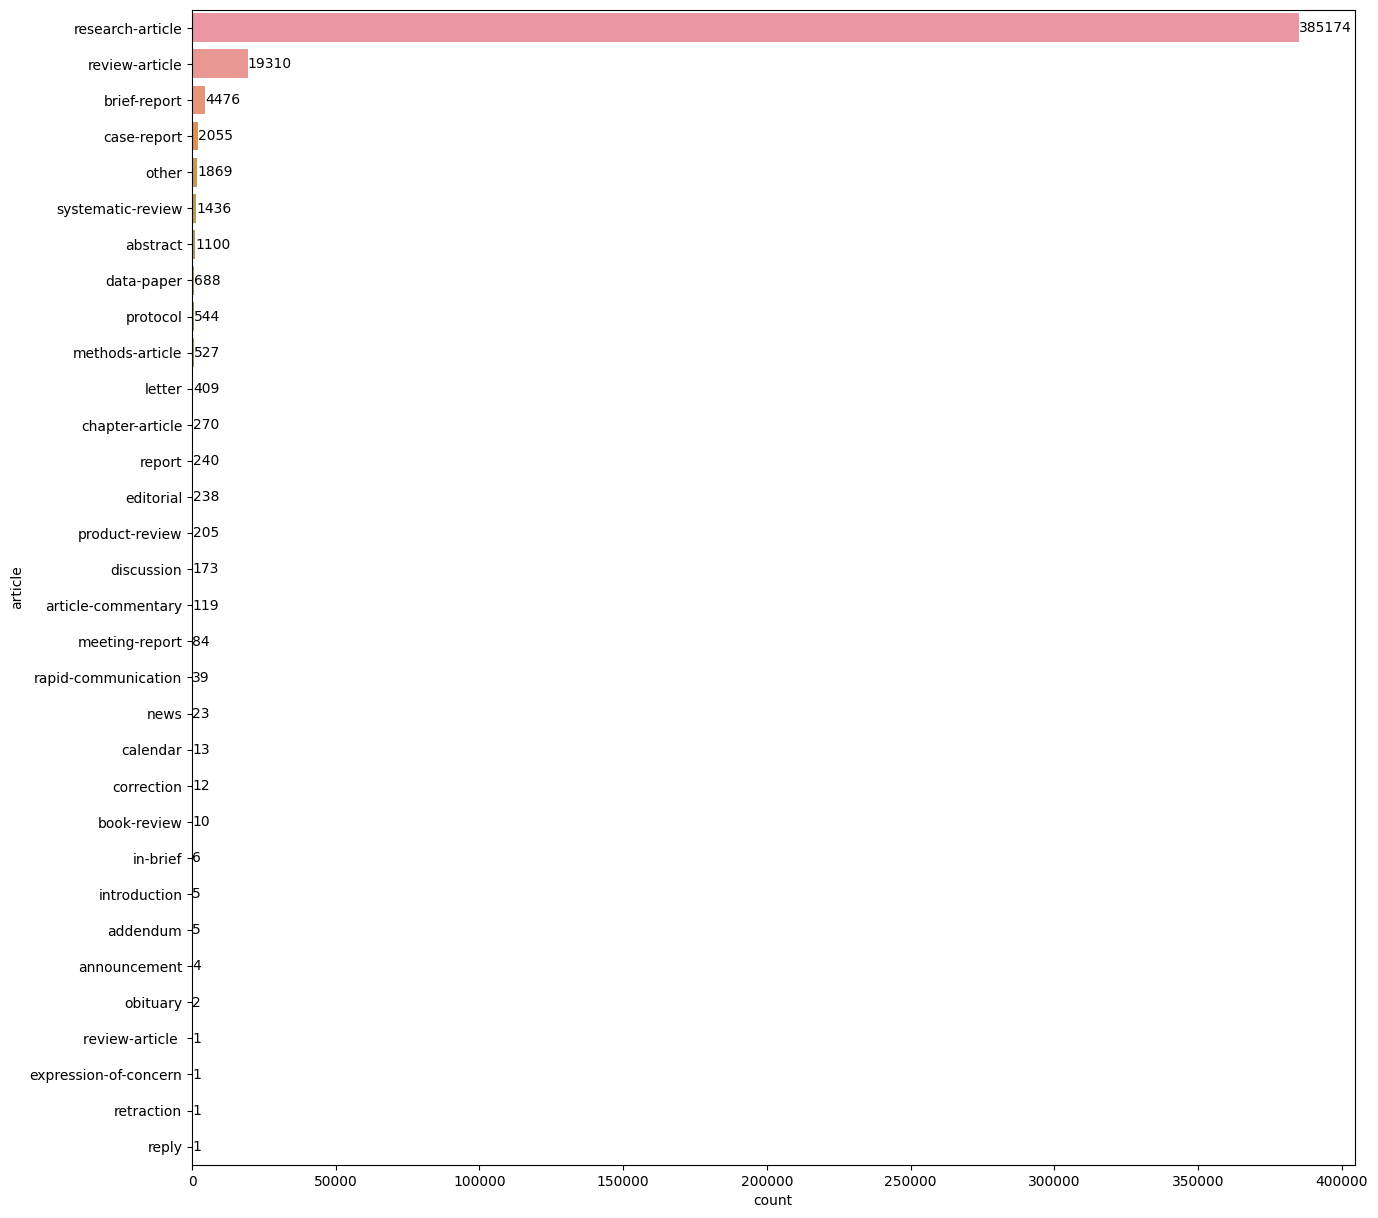

In [4]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(y=df_article['article'], x=df_article['count'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

# Getting the total by levels


The articles are often splitted in several parent levels. These contains different type of information. 

In [5]:
# Remove the lowest 1% 
#df_levels_to_plot = df_levels[df_levels['count'] > max(df_levels['count'])*0.01]

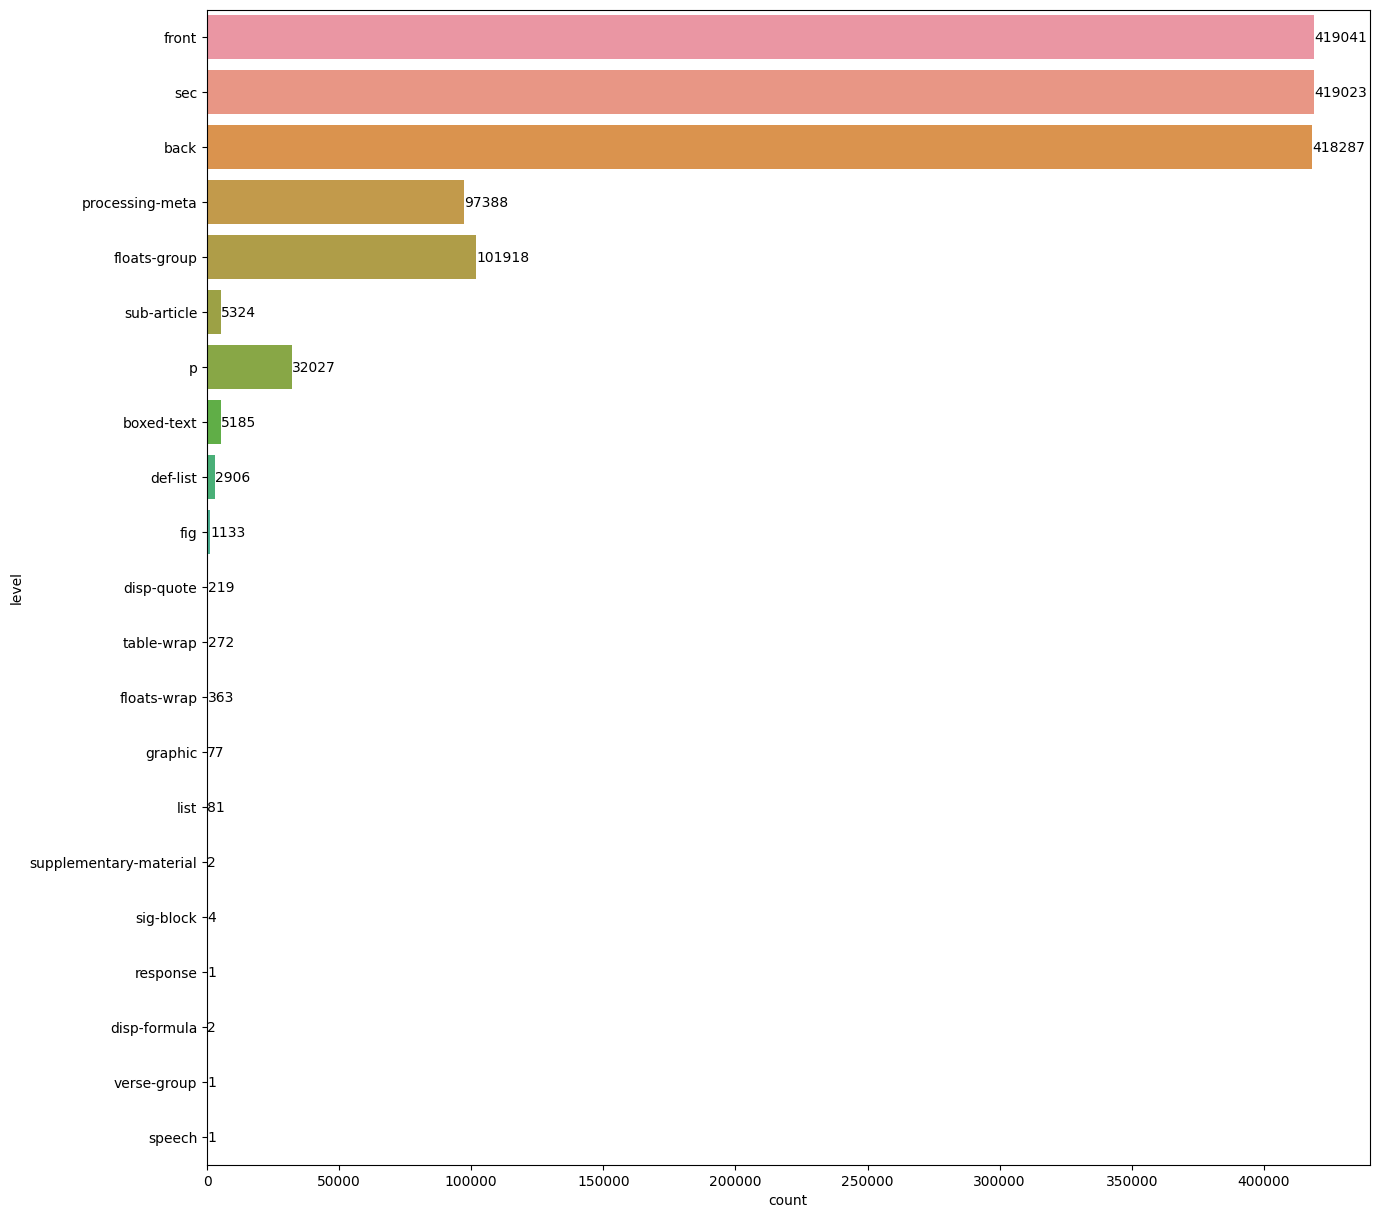

In [6]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(y=df_levels['level'], x=df_levels['count'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

# Getting the total of tag per section

In [7]:
# Remove the lowest 1% 
df_tags_to_plot = df_tags[df_tags['count'] > max(df_tags['count'])*0.01]

In [8]:
tag_count = df_tags_to_plot[['level', 'tag', 'count']].groupby(['level', 'tag']).agg(['max'])['count'].reset_index().sort_values(by='max', ascending=False)
#level_tag_count['level-tag'] = level_tag_count['level'] + '_' + level_tag_count['tag']
to_plot = tag_count[['tag', 'level', 'max']].head(400)

tag_count

level             tag     max
152        front           front  419041
117        front      article-id  419041
190        front        pub-date  419041
204        front      subj-group  419041
205        front         subject  419041
..           ...             ...     ...
293  sub-article            bold    4436
238          sec  funding-source    4386
81    boxed-text            list    4382
82    boxed-text       list-item    4382
80    boxed-text         caption    4250

[304 rows x 3 columns]

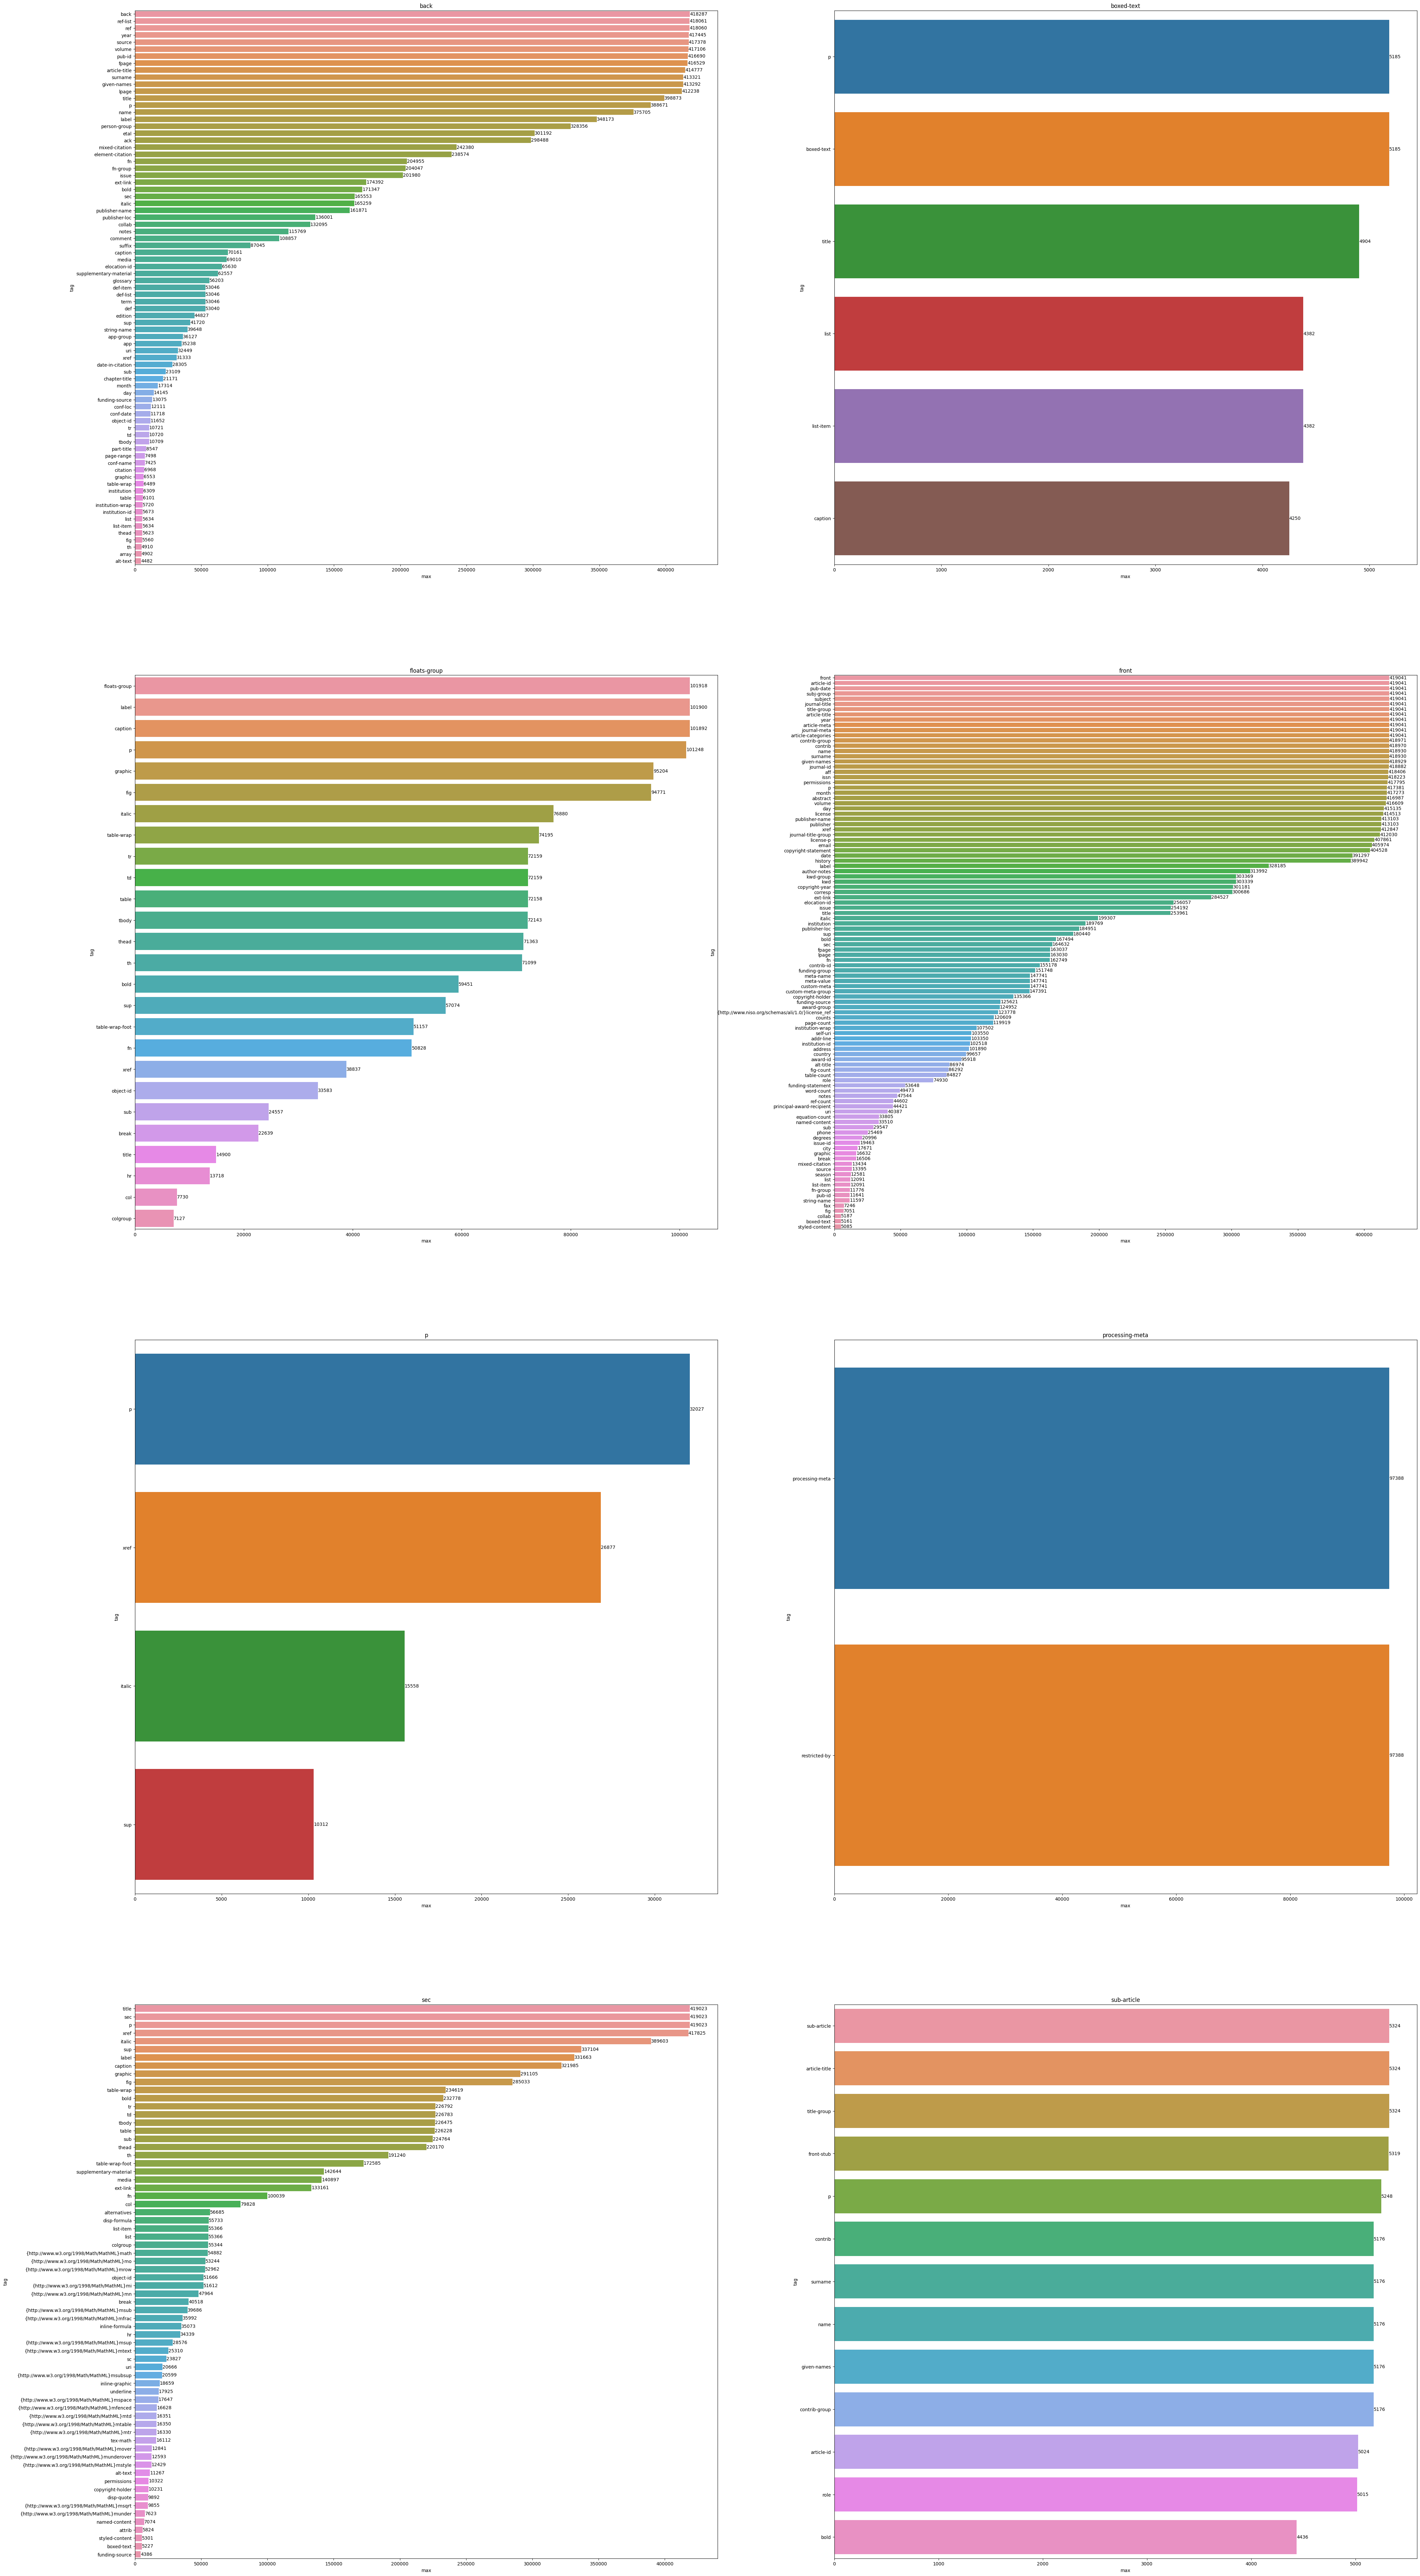

In [9]:
level_unique = len(to_plot['level'].unique())
n_col = 2
n_row = math.ceil(level_unique/n_col)
to_plot = to_plot

fig, axes = plt.subplots(n_row,n_col, figsize=(50,100))

n = 0
i = 0
for (level, grp) in to_plot.groupby("level"):
    sns.barplot(y="tag", 
                x="max", 
                data=grp,
                #order=grp.sort_values('max'),
                ax=axes[i,n], 
                orient='h')
    
    axes[i, n].set_title(f"{level}")
    axes[i, n].bar_label(axes[i, n].containers[0])
    n+=1
    if n > n_col-1:
        n=0
        i+=1
if n == 1:
    axes[i, n].remove()
plt.show()

# For the sec section

## Getting the attr and attr_value for the level sec and tag sec 

In [10]:
sec_attr_max = df_attr[(df_attr['level'] == 'sec') & (df_attr['tag'] == 'sec')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
sec_attr_max = sec_attr_max[sec_attr_max['max'] > max(sec_attr_max['max'])*0.01]
sec_attr_max['attr_attr_val'] = sec_attr_max['attr'] + '_' + sec_attr_max['attr_val']
sec_attr_max

attr                attr_val     max  \
1257440  sec-type                 results  206107   
1257116  sec-type              discussion  182243   
1257228  sec-type                   intro  153469   
1257526  sec-type  supplementary-material  140201   
1257292  sec-type       materials|methods  119652   
...           ...                     ...     ...   
15858          id             S0003-S2002    2116   
404427         id                 sec0006    2103   
392919         id                   s0100    2101   
392163         id             s0003-s2005    2092   
19023          id                  S3.SS5    2084   

                           attr_attr_val  
1257440                 sec-type_results  
1257116              sec-type_discussion  
1257228                   sec-type_intro  
1257526  sec-type_supplementary-material  
1257292       sec-type_materials|methods  
...                                  ...  
15858                     id_S0003-S2002  
404427                        id_sec0006  
392919                          id_s0100  
392163                    id_s0003-s2005  
19023                          id_S3.SS5  

[313 rows x 4 columns]

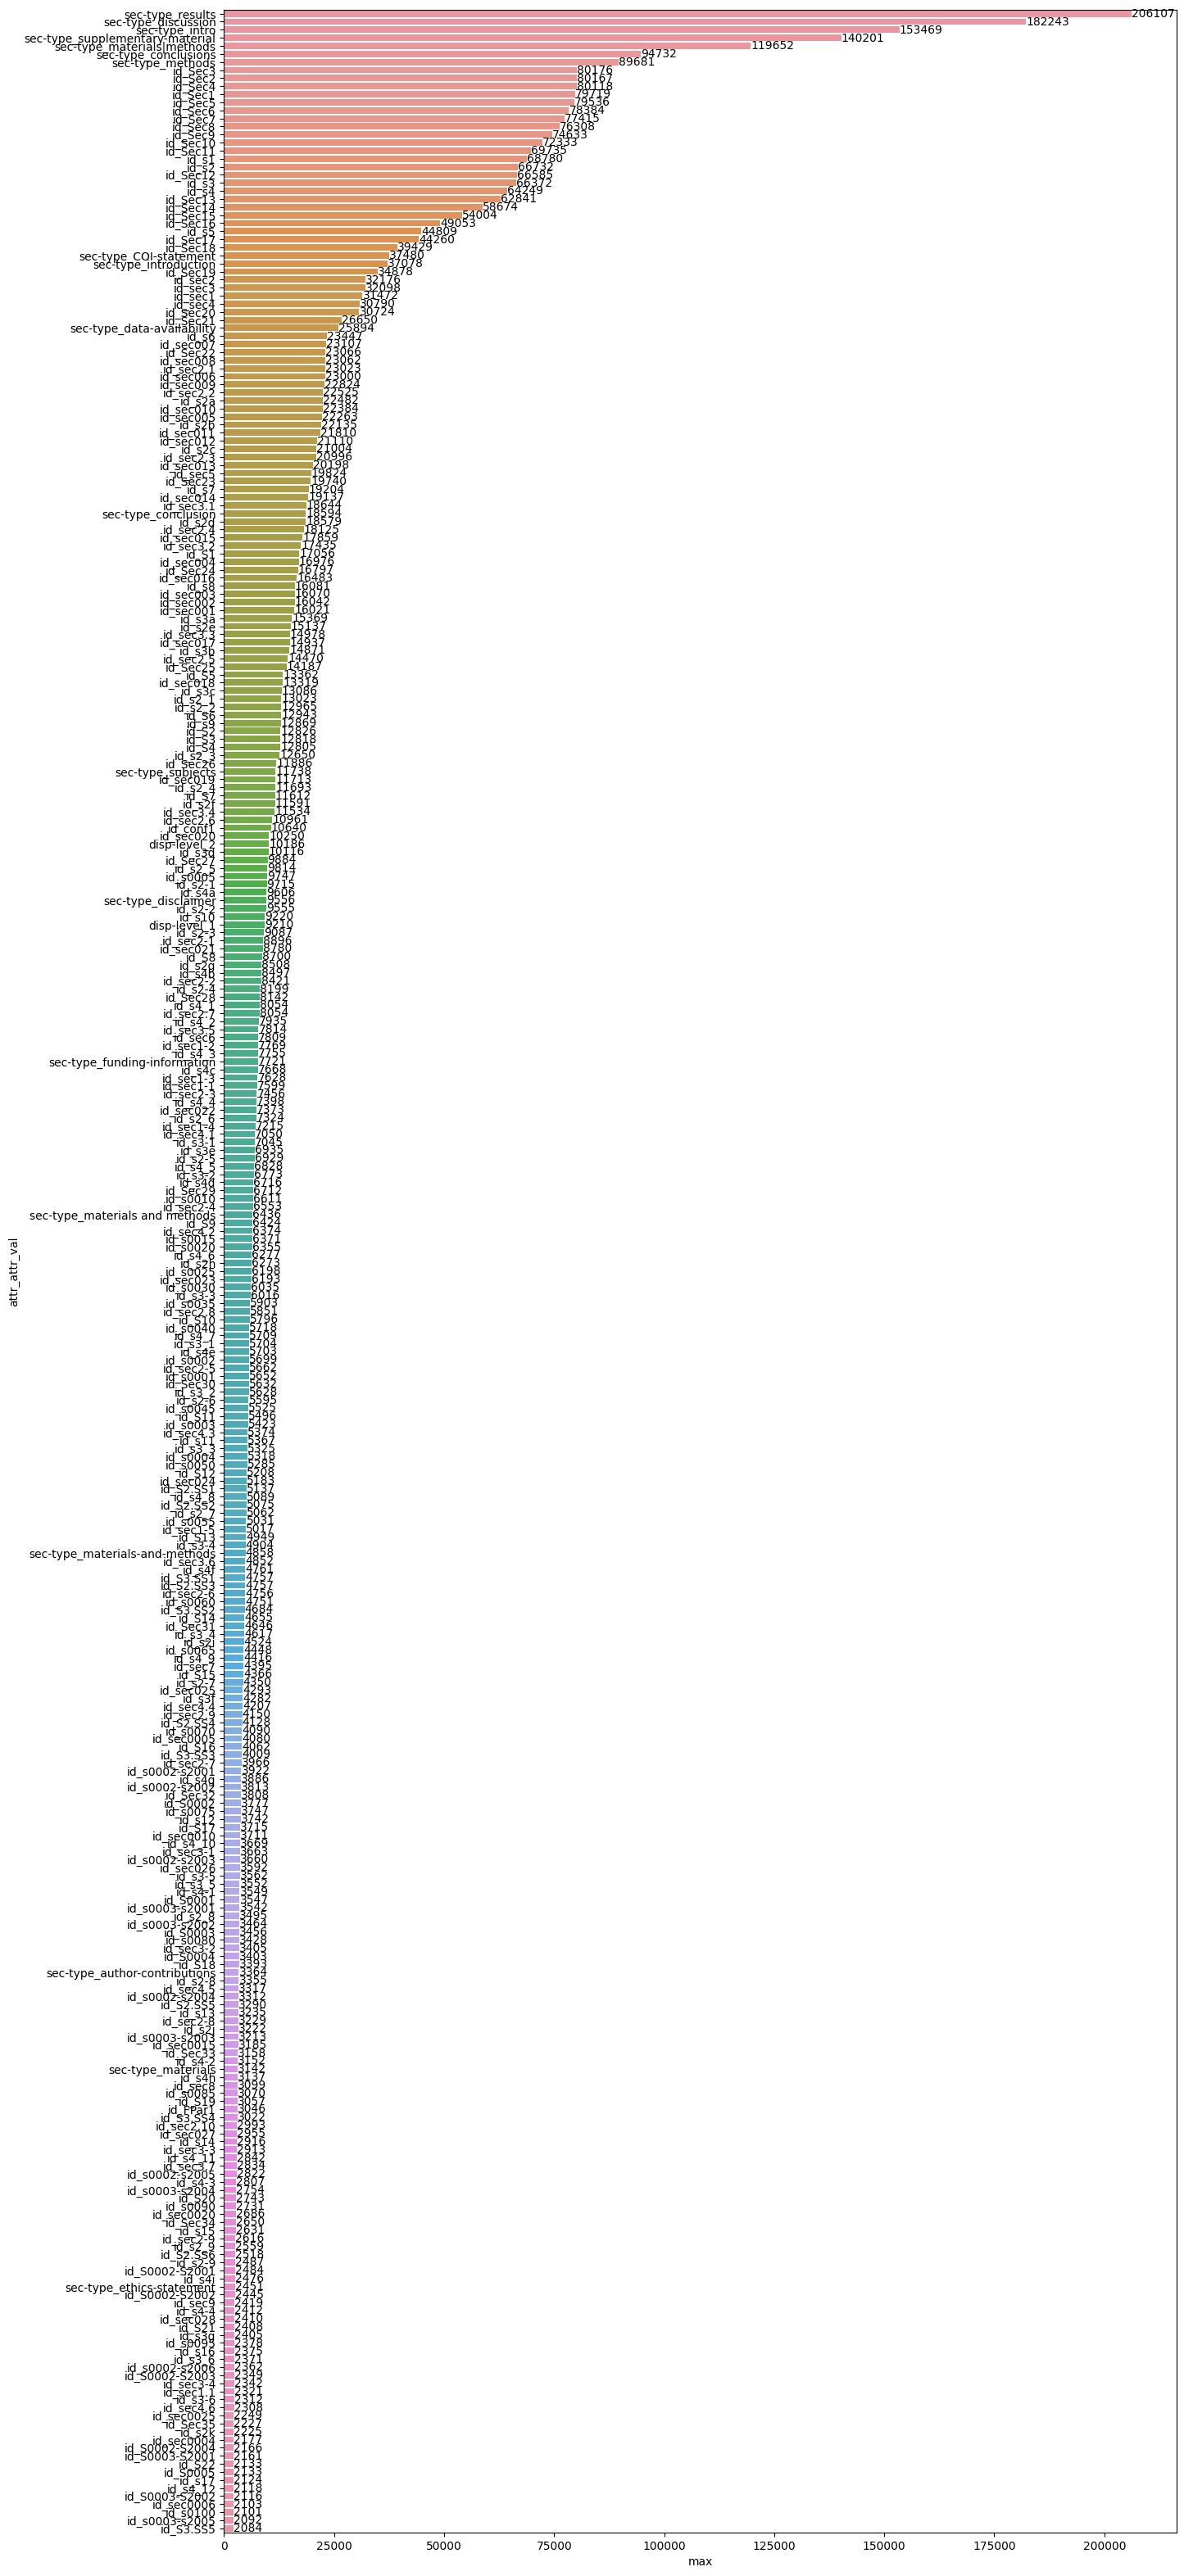

In [11]:
fig, ax = plt.subplots(figsize=(15,40))
ax = sns.barplot(y=sec_attr_max['attr_attr_val'], x=sec_attr_max['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

## Getting the attr and attr_value for the tag sec and attr sec-type

In [12]:
sec_sec_type_max = df_attr[(df_attr['level'] == 'sec') & (df_attr['tag'] == 'sec') & (df_attr['attr'] == 'sec-type')].groupby('attr_val')['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
sec_sec_type_max = sec_sec_type_max[sec_sec_type_max['max'] > 5]#max(sec_sec_type_max['max'])*0.0001]
sec_sec_type_max


attr_val     max
953                   results  206107
629                discussion  182243
741                     intro  153469
1039   supplementary-material  140201
805         materials|methods  119652
...                       ...     ...
295         Number of columns       6
1128  treatment-type material       6
296       Number of data sets       6
117             Data set name       6
378                Study area       6

[170 rows x 2 columns]

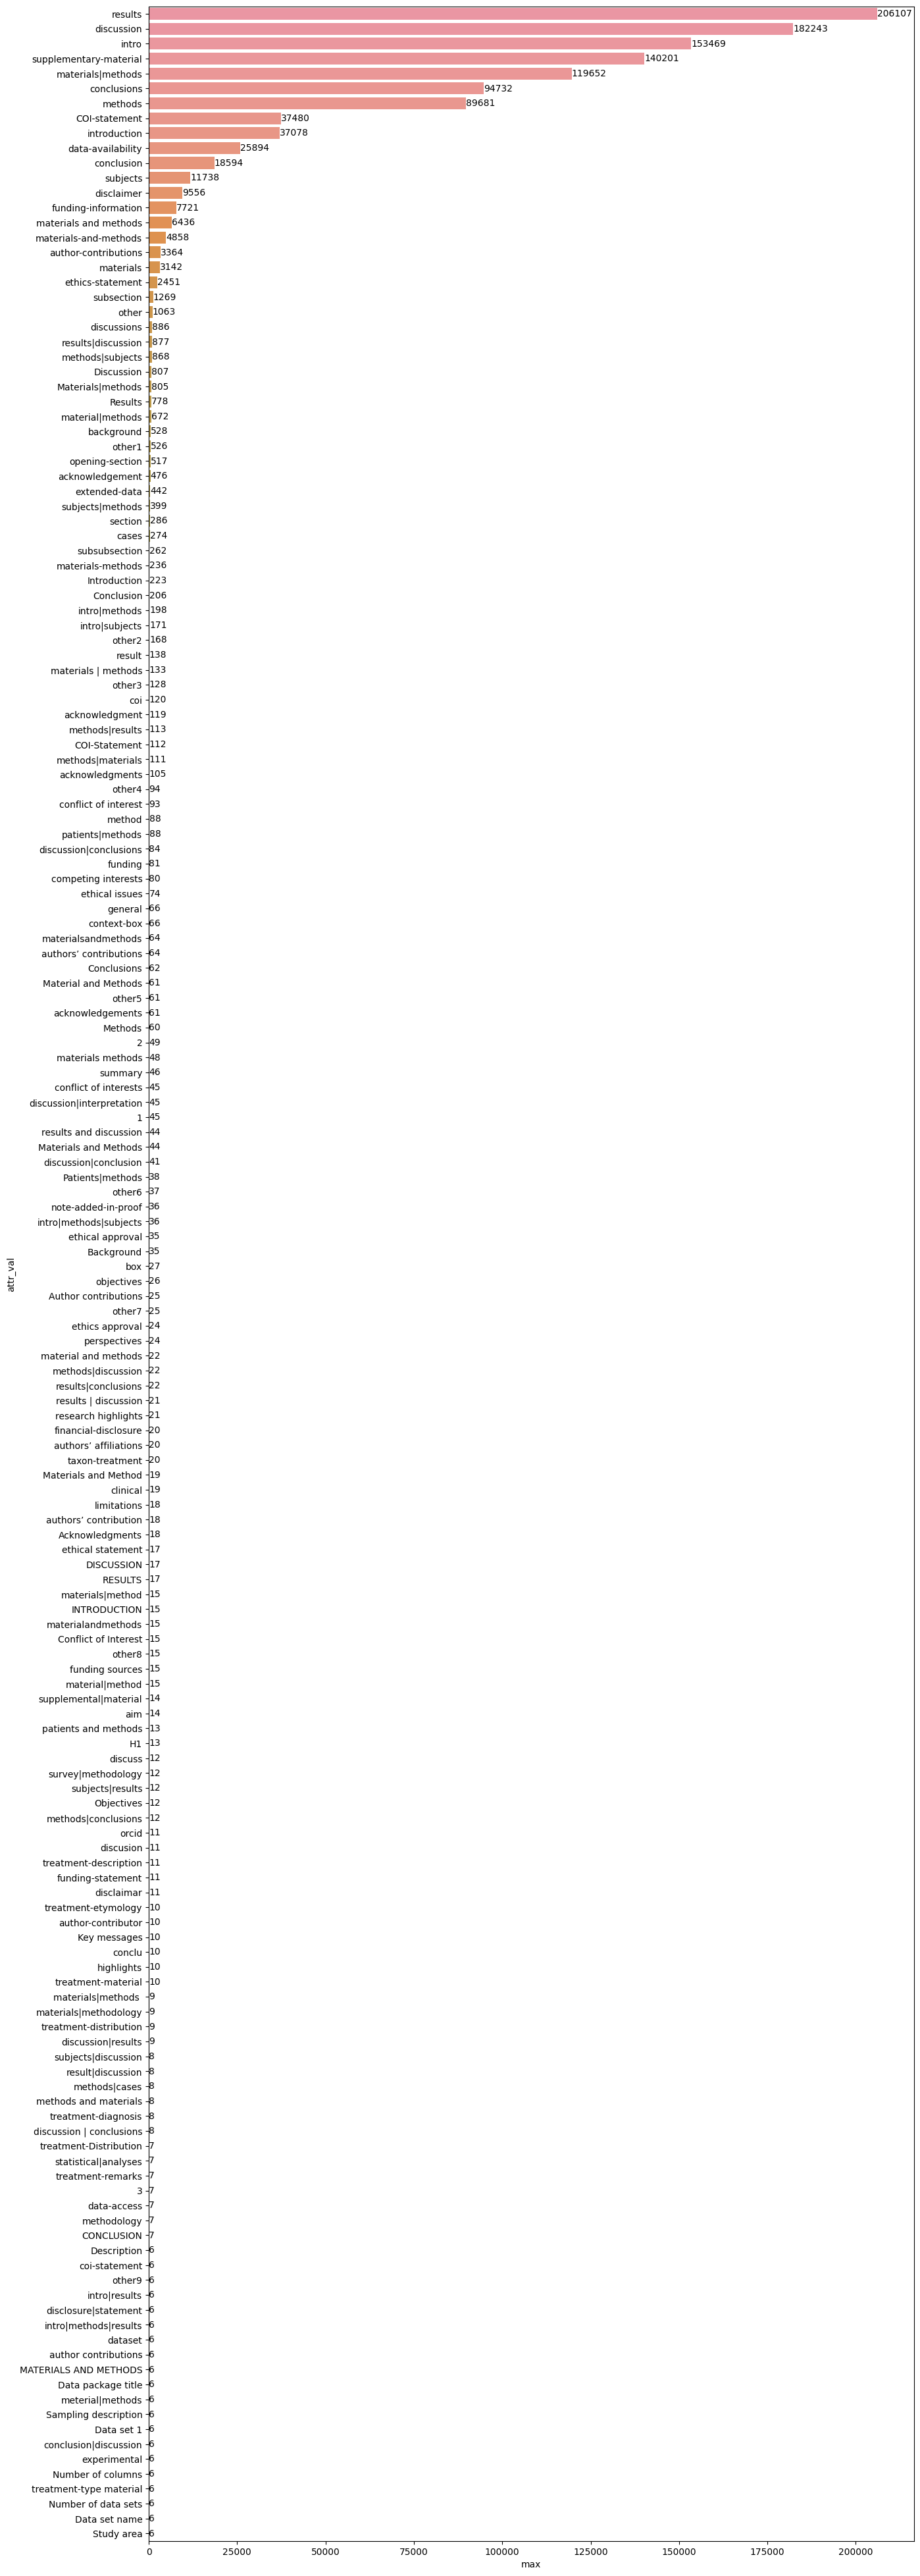

In [13]:
fig, ax = plt.subplots(figsize=(15,50))
ax = sns.barplot(y=sec_sec_type_max['attr_val'], x=sec_sec_type_max['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

# For the front level

In [14]:
front_sec_type_max = df_attr[(df_attr['level'] == 'front')].groupby(['tag'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
front_sec_type_max = front_sec_type_max[front_sec_type_max['max'] > max(front_sec_type_max['max'])*0.001]
front_sec_type_max

tag     max
9                                  article-id  419041
26                                    contrib  418967
65                                 journal-id  418366
60                                       issn  416967
100                                subj-group  416950
..                                        ...     ...
20                                     collab     622
47                                   fn-group     584
124  {http://www.w3.org/1998/Math/MathML}math     575
39                               elocation-id     492
36                                   def-list     445

[68 rows x 2 columns]

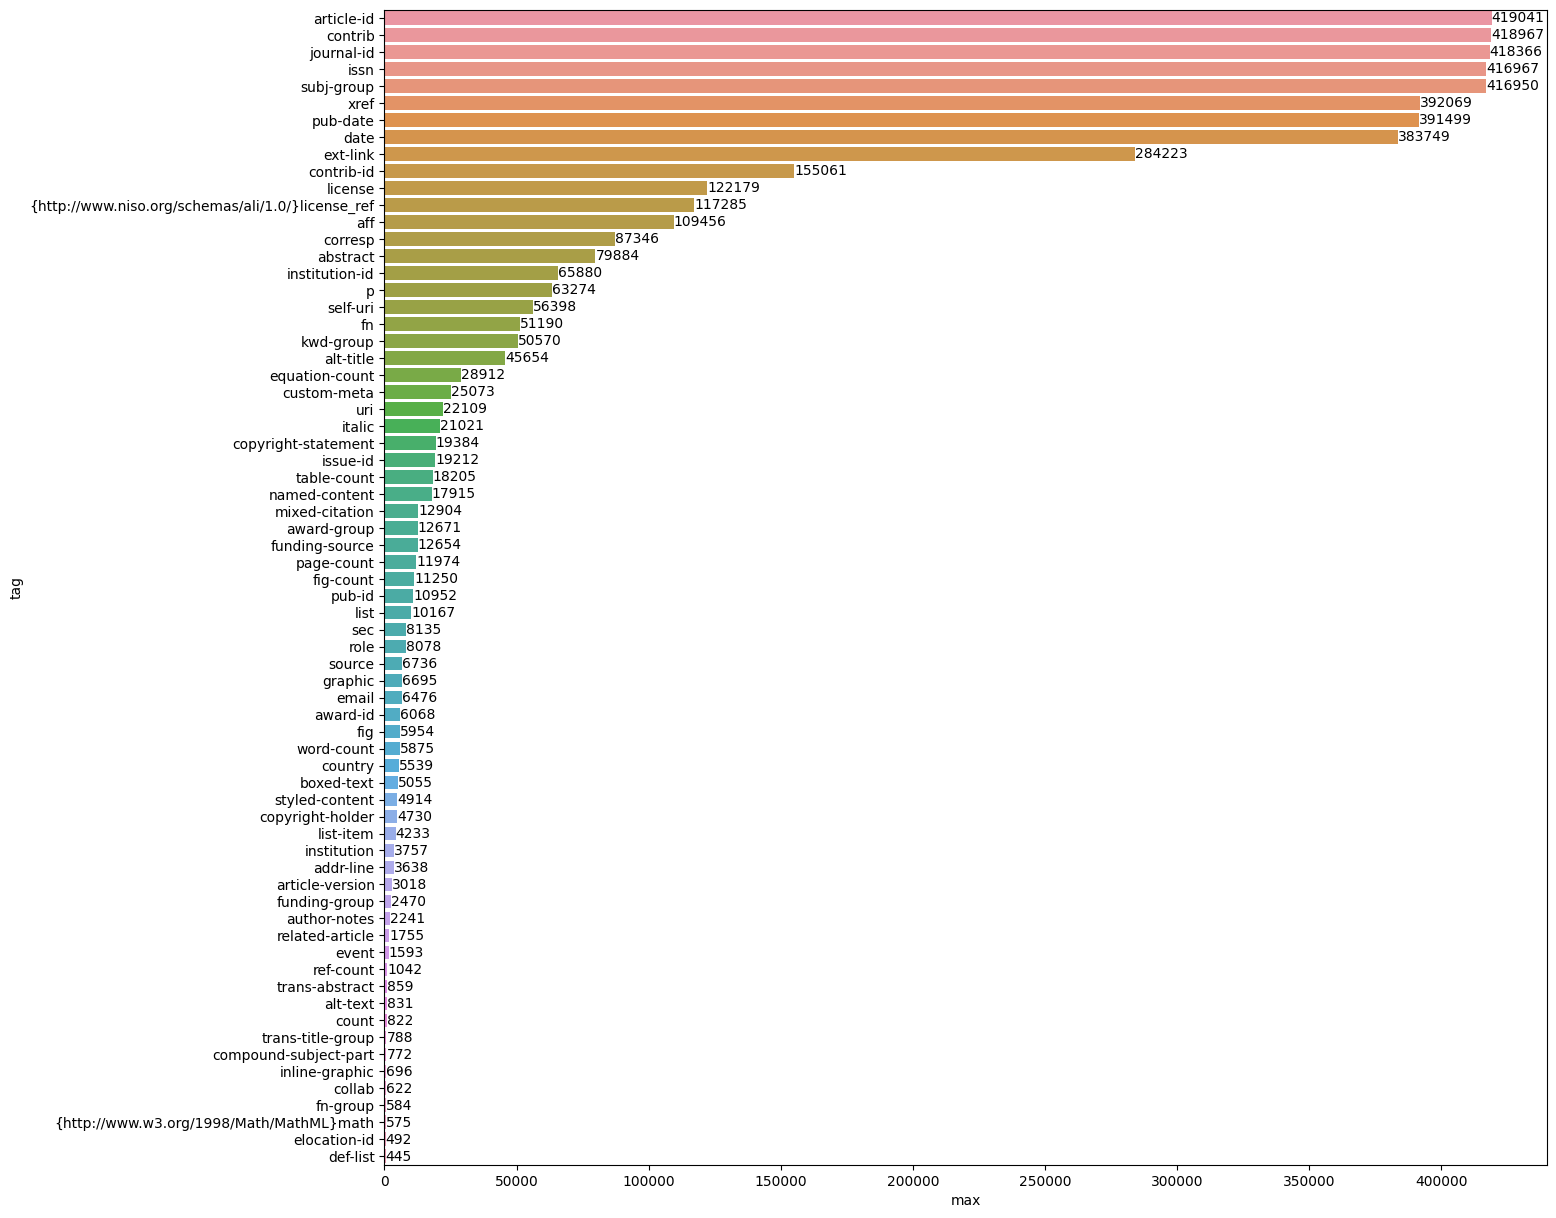

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(y=front_sec_type_max['tag'], x=front_sec_type_max['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

## Attr and attr_val for tag article-id

In [16]:
front_sec_type_max = df_attr[(df_attr['level'] == 'front') & (df_attr['tag'] == 'article-id')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
#front_sec_type_max = front_sec_type_max[front_sec_type_max['max'] > max(front_sec_type_max['max'])*0.01]
front_sec_type_max['attr_attr_val'] = front_sec_type_max['attr'] + '_' + front_sec_type_max['attr_val']
front_sec_type_max

attr              attr_val     max  \
10   pub-id-type                 pmcid  419041   
5    pub-id-type                   doi  411432   
12   pub-id-type          publisher-id  331142   
11   pub-id-type                  pmid  154995   
9    pub-id-type                   pii   23724   
6    pub-id-type            manuscript    5426   
1    pub-id-type         art-access-id    4873   
8    pub-id-type                 other    3960   
13   pub-id-type  publisher-manuscript    1162   
14   pub-id-type                  sici     680   
7    pub-id-type               medline     170   
3    pub-id-type                 coden     131   
16  specific-use          previous-pid      20   
17  specific-use     scholarone-sub-id       9   
2    pub-id-type                 arxiv       6   
15  specific-use           previous-id       4   
0    pub-id-type             accession       3   
4    pub-id-type                  doaj       1   

                       attr_attr_val  
10                 pub-id-type_pmcid  
5                    pub-id-type_doi  
12          pub-id-type_publisher-id  
11                  pub-id-type_pmid  
9                    pub-id-type_pii  
6             pub-id-type_manuscript  
1          pub-id-type_art-access-id  
8                  pub-id-type_other  
13  pub-id-type_publisher-manuscript  
14                  pub-id-type_sici  
7                pub-id-type_medline  
3                  pub-id-type_coden  
16         specific-use_previous-pid  
17    specific-use_scholarone-sub-id  
2                  pub-id-type_arxiv  
15          specific-use_previous-id  
0              pub-id-type_accession  
4                   pub-id-type_doaj

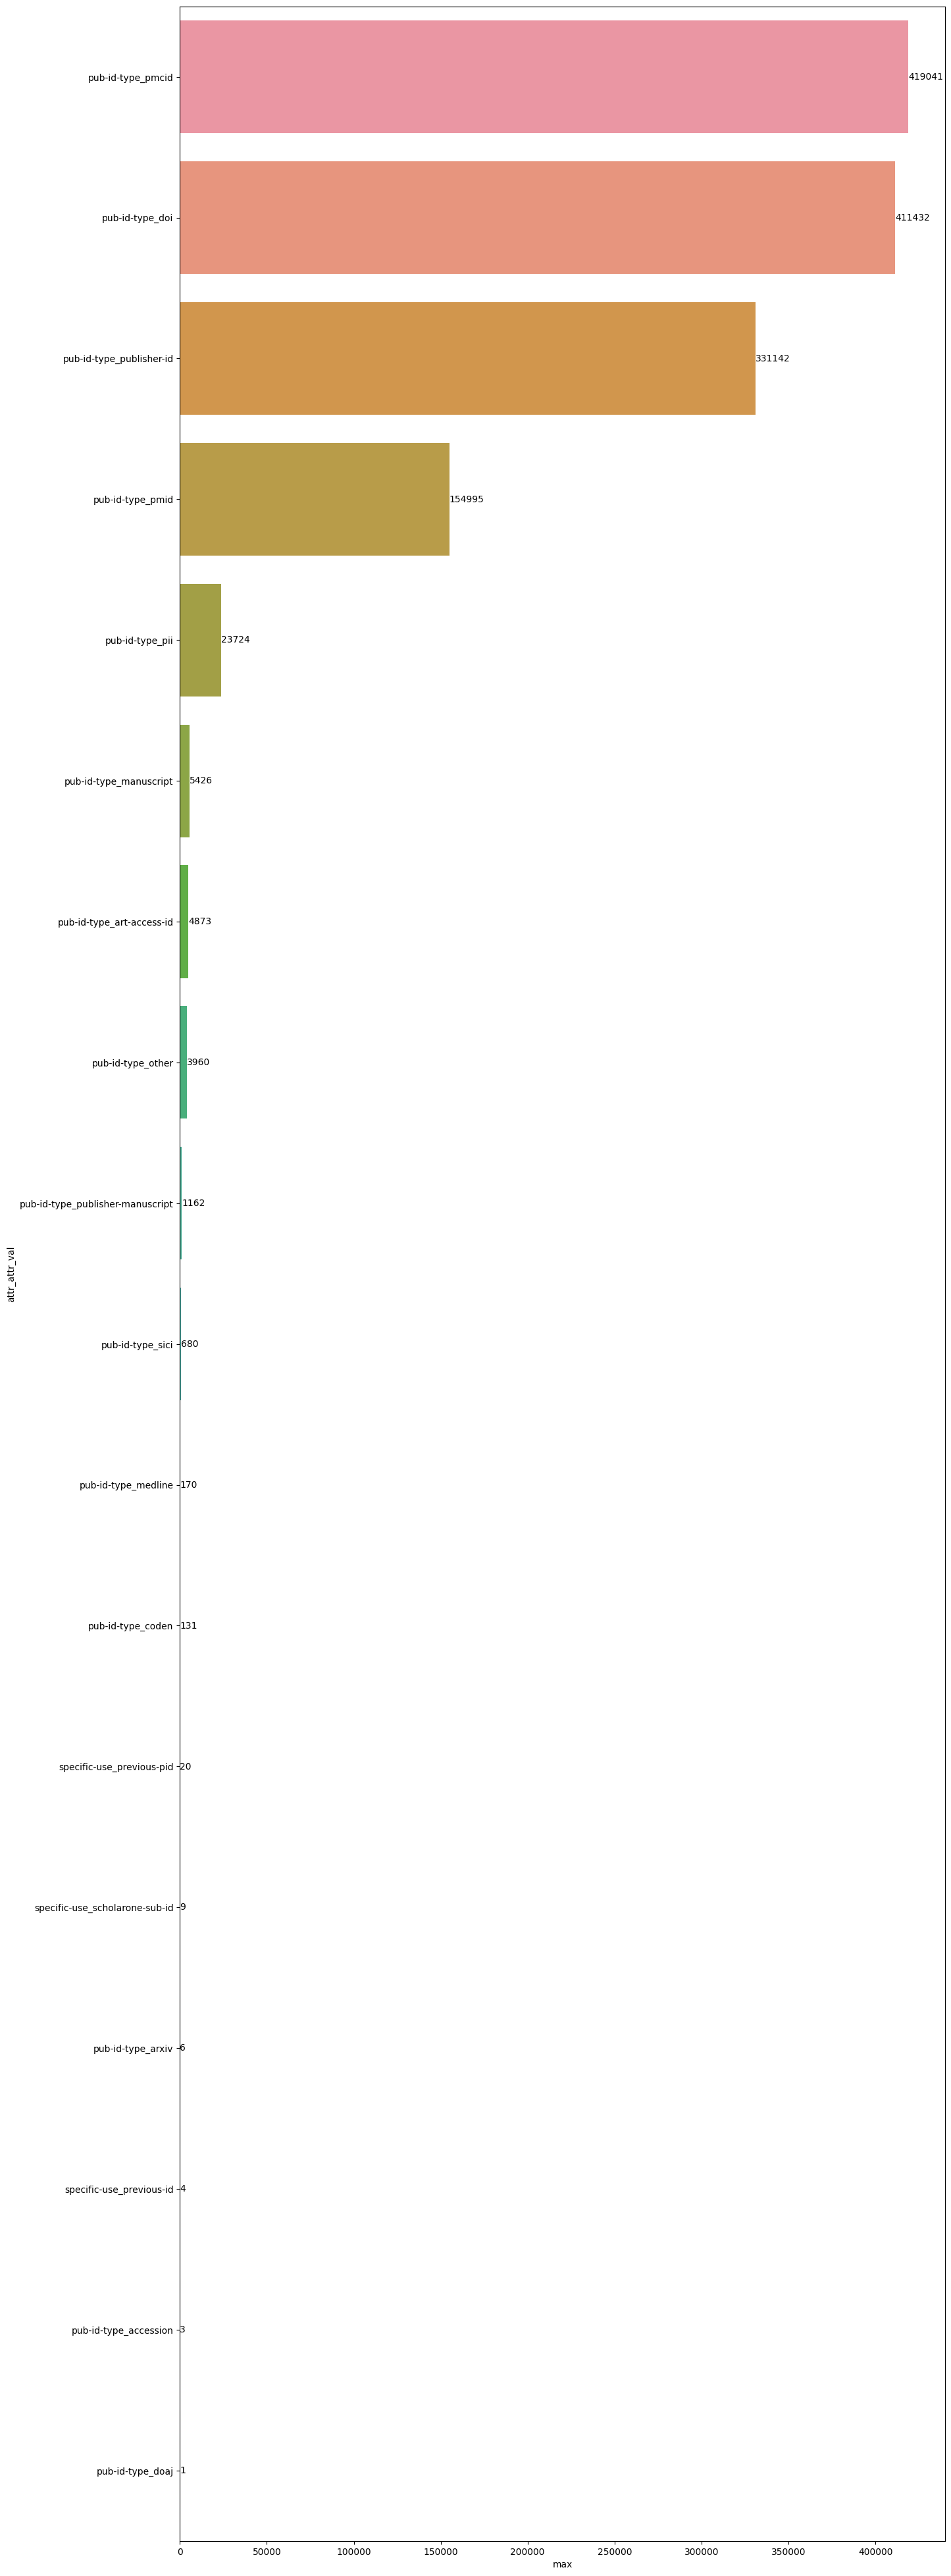

In [17]:
fig, ax = plt.subplots(figsize=(15,50))
ax = sns.barplot(y=front_sec_type_max['attr_attr_val'], x=front_sec_type_max['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

## Attr and attr_val for contrib

In [18]:
contrib = df_attr[(df_attr['level'] == 'front') & (df_attr['tag'] == 'contrib')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
contrib['attr_attr_val'] = contrib['attr'] + '_' + contrib['attr_val']
contrib = contrib[contrib['max'] > max(contrib['max'])*0.01]

contrib

attr attr_val     max        attr_attr_val
0       contrib-type   author  418967  contrib-type_author
6            corresp      yes  176327          corresp_yes
2       contrib-type   editor   81036  contrib-type_editor
10     equal-contrib      yes   40745    equal-contrib_yes
11                id       A1   19723                id_A1
121               id       A2   19420                id_A2
132               id       A3   18096                id_A3
143               id       A4   15944                id_A4
154               id       A5   13361                id_A5
165               id       A6   10640                id_A6
16920             id      au1    8332               id_au1
176               id       A7    8215                id_A7
18293             id      au2    8184               id_au2
19528             id      au3    7698               id_au3
20749             id      au4    7011               id_au4
21470             id      au5    6189               id_au5
187               id       A8    6108                id_A8
21995             id      au6    5329               id_au6
198               id       A9    4503                id_A9
22209             id      au7    4470               id_au7

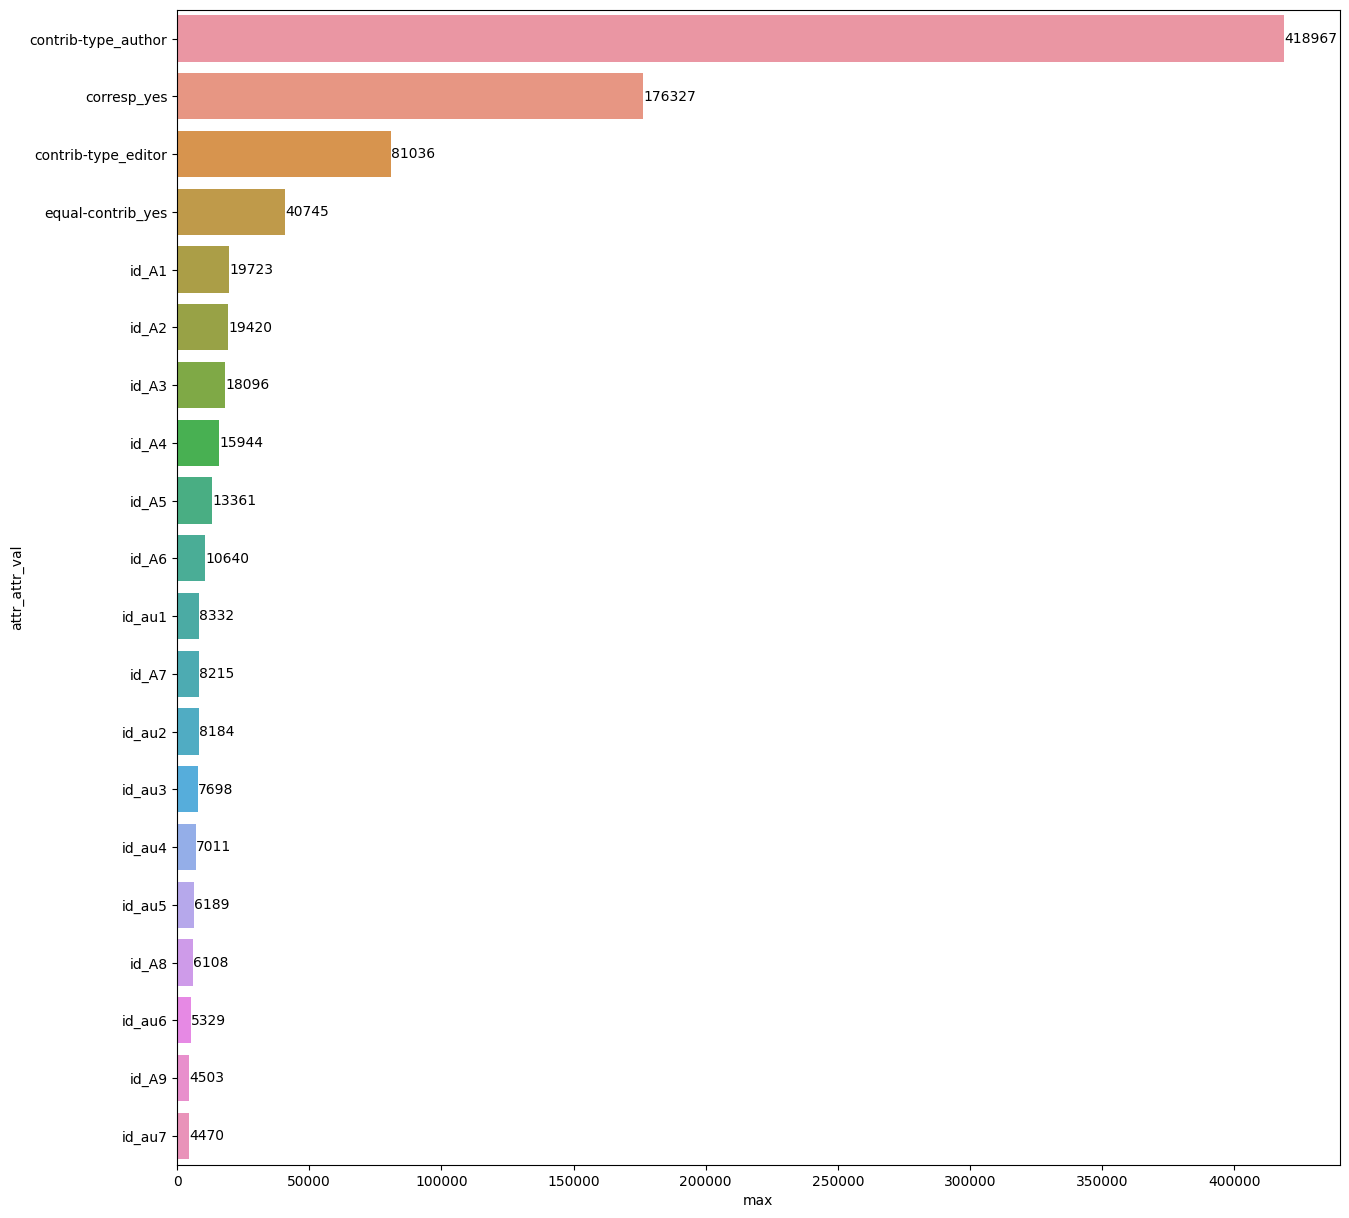

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(y=contrib['attr_attr_val'], x=contrib['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

## Attr and attr_val for journal-id

In [20]:
journal_id = df_attr[(df_attr['level'] == 'front') & (df_attr['tag'] == 'journal-id')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
journal_id['attr_attr_val'] = journal_id['attr'] + '_' + journal_id['attr_val']
journal_id

attr        attr_val     max                   attr_attr_val
9   journal-id-type          nlm-ta  418366          journal-id-type_nlm-ta
6   journal-id-type      iso-abbrev  397298      journal-id-type_iso-abbrev
11  journal-id-type    publisher-id  266545    journal-id-type_publisher-id
10  journal-id-type             pmc   51695             journal-id-type_pmc
4   journal-id-type             hwp   26278             journal-id-type_hwp
3   journal-id-type             doi   20535             journal-id-type_doi
8   journal-id-type  nlm-journal-id    5419  journal-id-type_nlm-journal-id
12  journal-id-type    pubmed-jr-id    5186    journal-id-type_pubmed-jr-id
2   journal-id-type           coden    2876           journal-id-type_coden
7   journal-id-type            issn     915            journal-id-type_issn
1   journal-id-type         archive     272         journal-id-type_archive
0   journal-id-type      aggregator      32      journal-id-type_aggregator
5   journal-id-type           index      27           journal-id-type_index
13  journal-id-type              sc       3              journal-id-type_sc

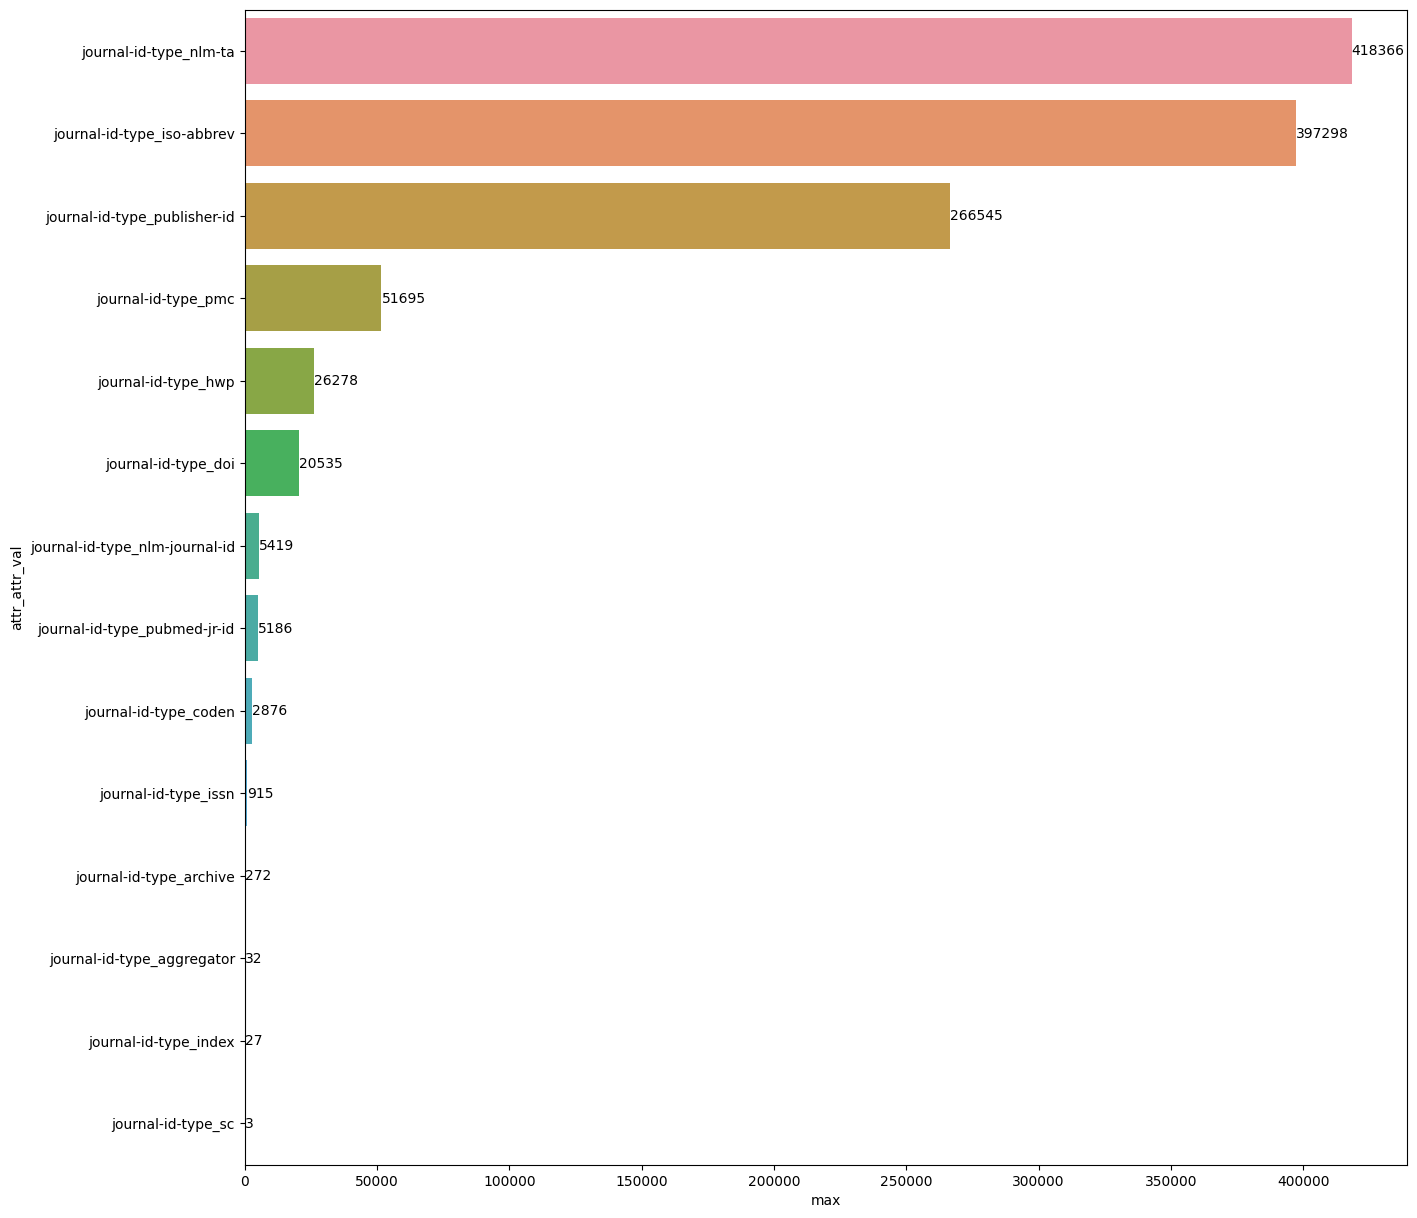

In [21]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(y=journal_id['attr_attr_val'], x=journal_id['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

## Attr and attr_val for issn

In [22]:
issn = df_attr[(df_attr['level'] == 'front') & (df_attr['tag'] == 'issn')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
issn['attr_attr_val'] = issn['attr'] + '_' + issn['attr_val']

issn

attr attr_val     max  attr_attr_val
0  pub-type     epub  416967  pub-type_epub
1  pub-type     ppub  160063  pub-type_ppub

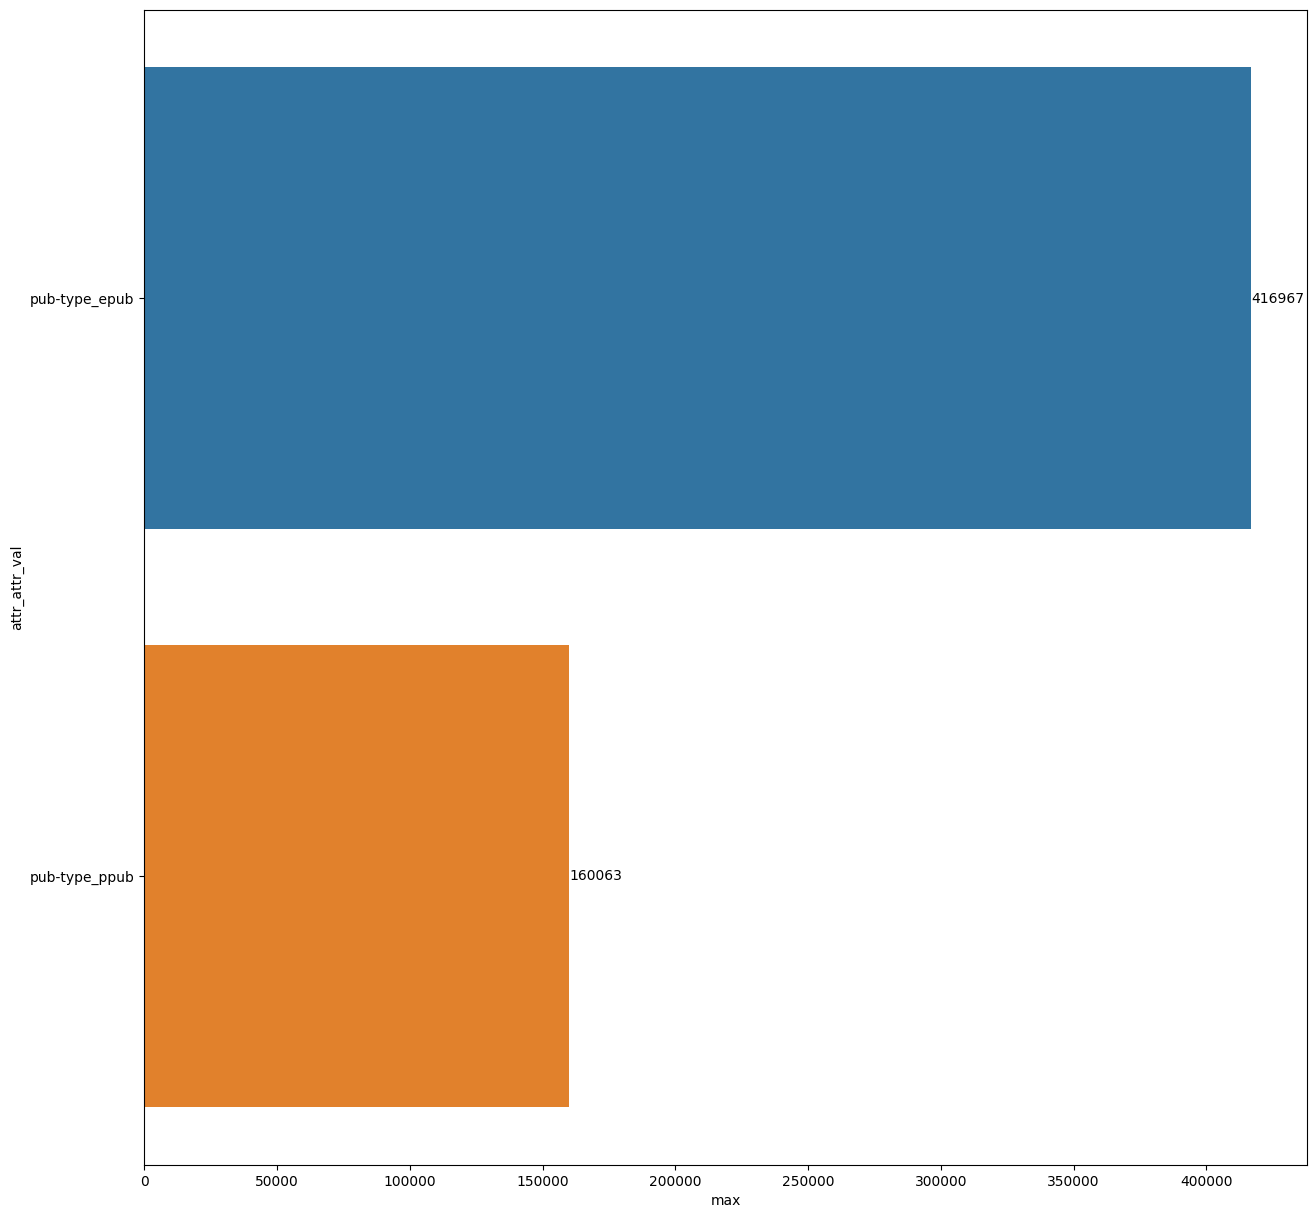

In [23]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(y=issn['attr_attr_val'], x=issn['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

## Attr and attr_val for subj-group

In [24]:
subj_group = df_attr[(df_attr['level'] == 'front') & (df_attr['tag'] == 'subj-group')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
subj_group['attr_attr_val'] = subj_group['attr'] + '_' + subj_group['attr_val']
subj_group = subj_group[subj_group['max'] > max(subj_group['max'])*0.01]

subj_group

attr          attr_val     max  \
64  subj-group-type           heading  416950   
75  subj-group-type          overline   21085   
12  subj-group-type     Discipline-v3   19085   
10  subj-group-type     Discipline-v2   14299   
67  subj-group-type  hwp-journal-coll    8798   
38  subj-group-type      article-type    6669   

                       attr_attr_val  
64           subj-group-type_heading  
75          subj-group-type_overline  
12     subj-group-type_Discipline-v3  
10     subj-group-type_Discipline-v2  
67  subj-group-type_hwp-journal-coll  
38      subj-group-type_article-type

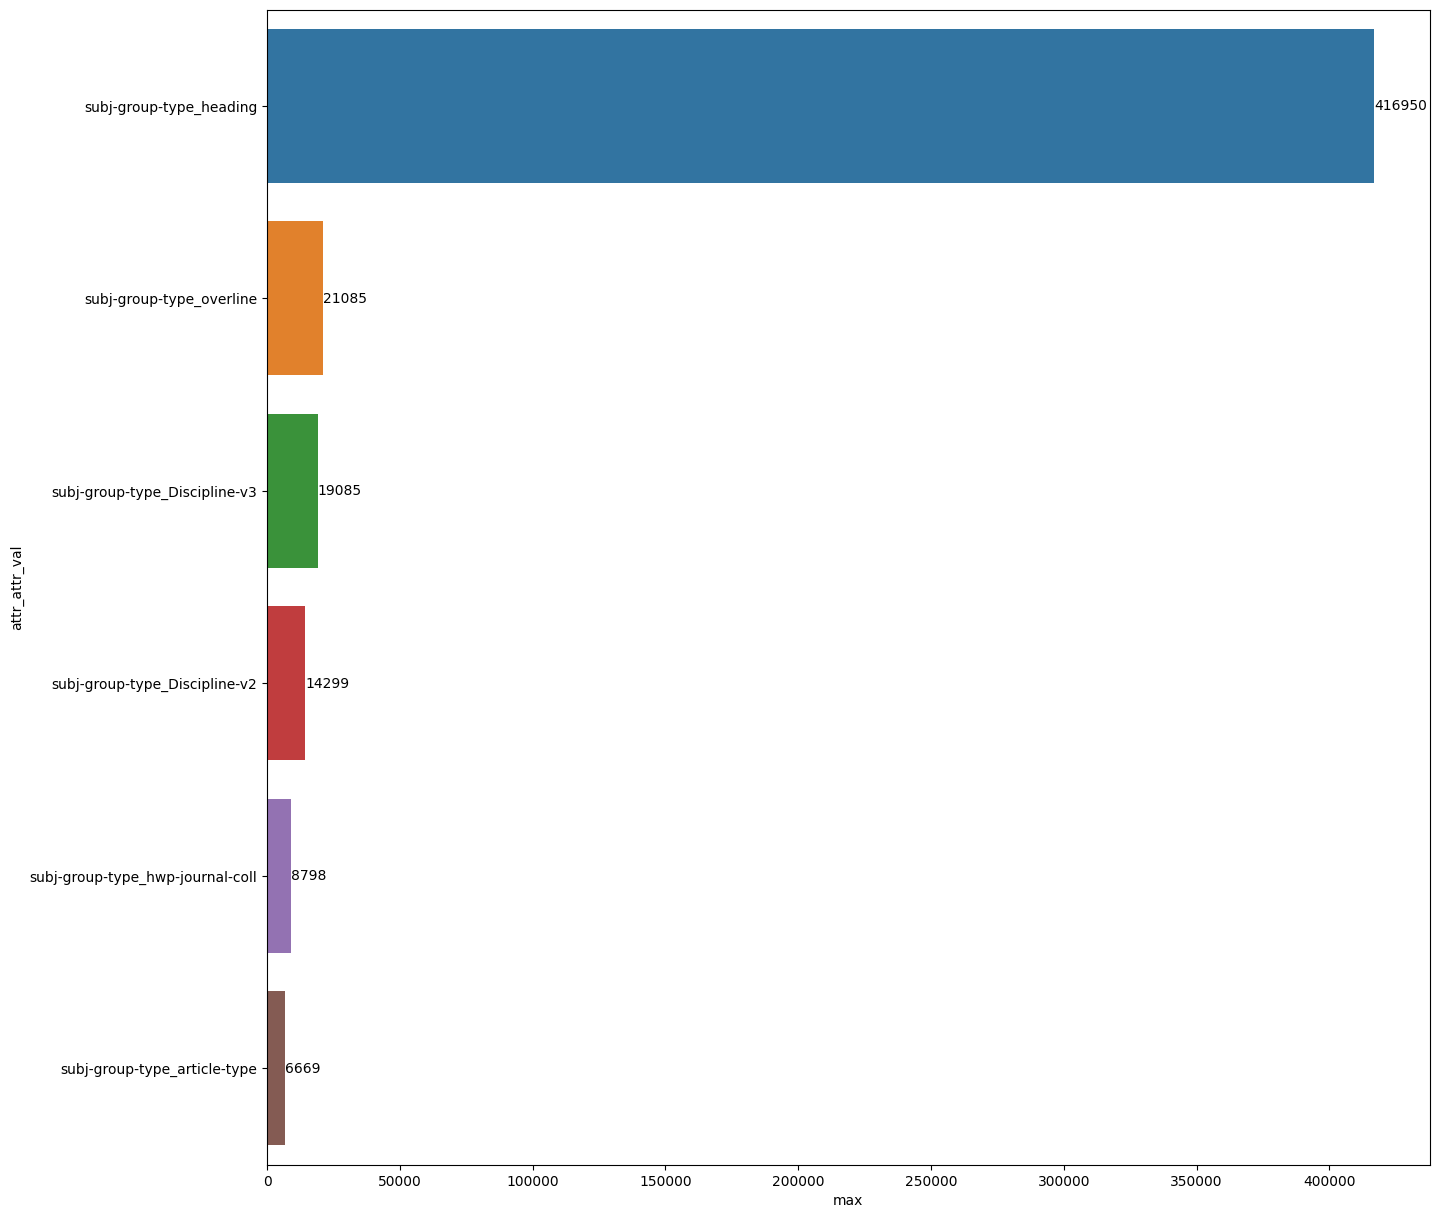

In [25]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(y=subj_group['attr_attr_val'], x=subj_group['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

## Attr and attr_val for xref

In [26]:
xref = df_attr[(df_attr['level'] == 'front') & (df_attr['tag'] == 'xref')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
xref['attr_attr_val'] = xref['attr'] + '_' + xref['attr_val']
xref = xref[xref['max'] > max(xref['max'])*0.01]
xref

attr attr_val     max     attr_attr_val
34      ref-type      aff  392069      ref-type_aff
47      ref-type  corresp  223318  ref-type_corresp
234462       rid     aff1  105827          rid_aff1
239488       rid     aff2   97426          rid_aff2
2764         rid     Aff1   79486          rid_Aff1
...          ...      ...     ...               ...
341931       rid     cor2    4311          rid_cor2
234196       rid  aff0005    4134       rid_aff0005
441          rid       A7    4101            rid_A7
239081       rid    aff11    4045         rid_aff11
5920         rid       a4    3932            rid_a4

[66 rows x 4 columns]

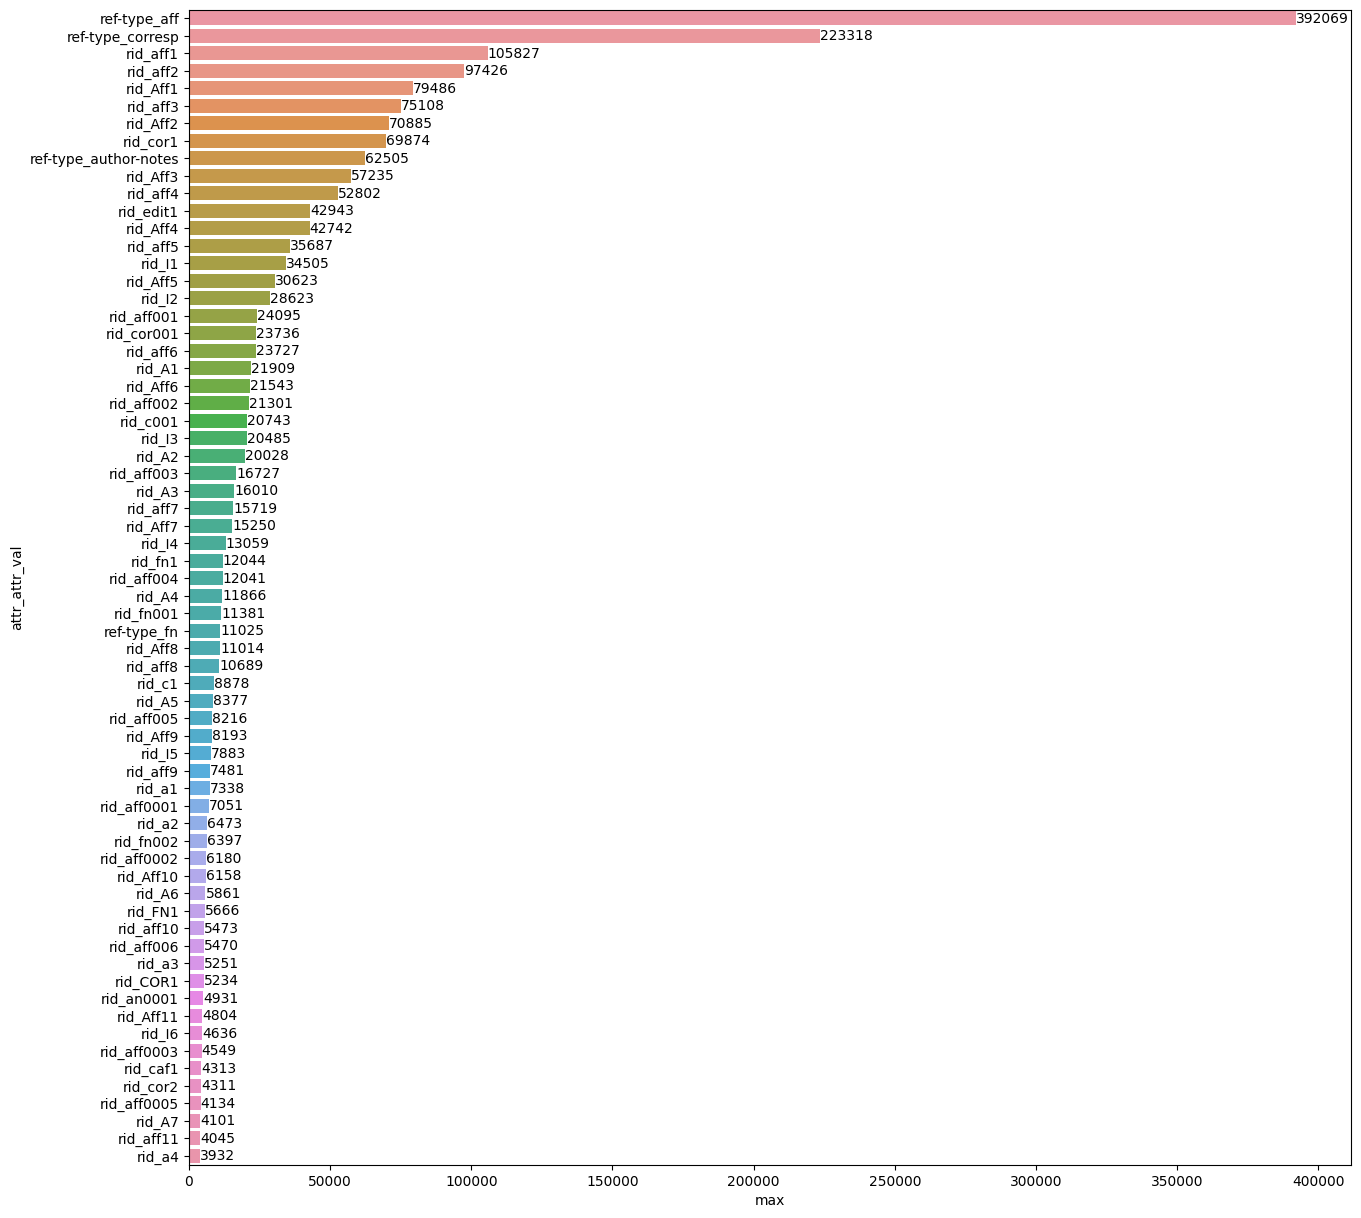

In [27]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(y=xref['attr_attr_val'], x=xref['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

## Attr and attr_val for pub-date

In [28]:
pub_date = df_attr[(df_attr['level'] == 'front') & (df_attr['tag'] == 'pub-date')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
pub_date['attr_attr_val'] = pub_date['attr'] + '_' + pub_date['attr_val']
pub_date = pub_date[pub_date['max'] > max(pub_date['max'])*0.01]

pub_date

attr         attr_val     max  \
3032            pub-type             epub  391499   
3029            pub-type       collection  301756   
3035            pub-type      pmc-release  139733   
3037            pub-type             ppub  109117   
2              date-type              pub    9845   
3039  publication-format       electronic    8778   
0              date-type       collection    6407   
3034            pub-type  nihms-submitted    5404   

                      attr_attr_val  
3032                  pub-type_epub  
3029            pub-type_collection  
3035           pub-type_pmc-release  
3037                  pub-type_ppub  
2                     date-type_pub  
3039  publication-format_electronic  
0              date-type_collection  
3034       pub-type_nihms-submitted

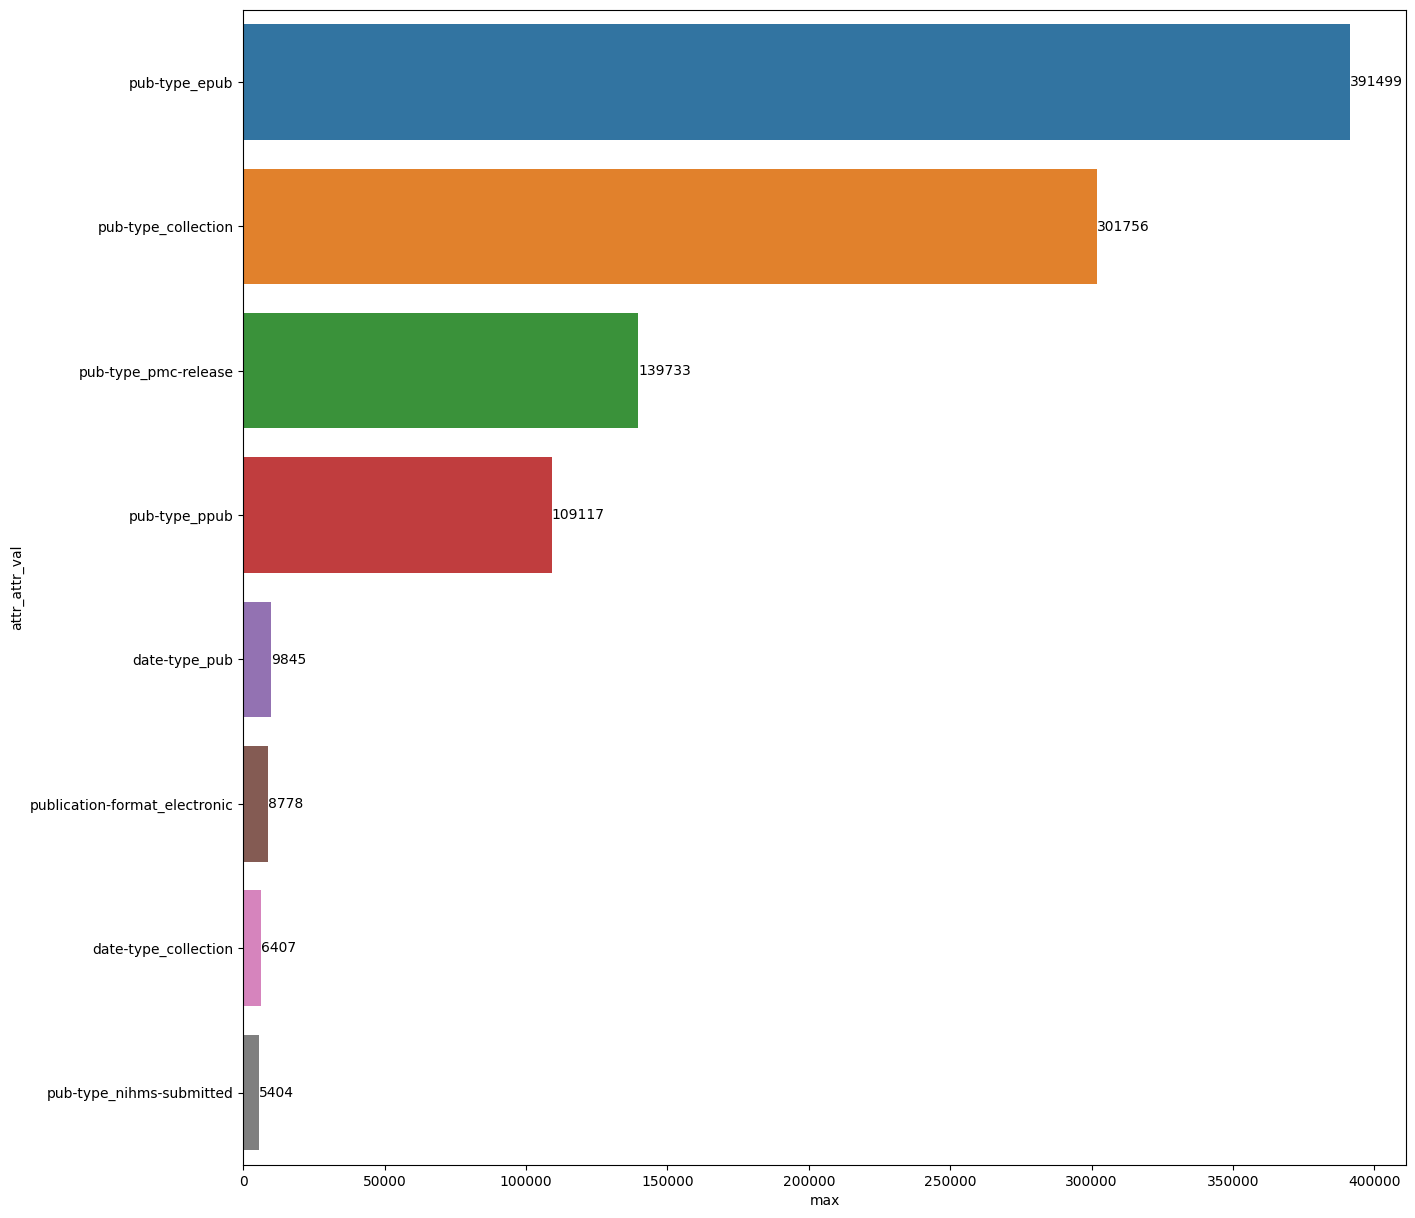

In [29]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(y=pub_date['attr_attr_val'], x=pub_date['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

## Attr and attr_val for date

In [30]:
date = df_attr[(df_attr['level'] == 'front') & (df_attr['tag'] == 'date')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
date['attr_attr_val'] = date['attr'] + '_' + date['attr_val']
date = date[date['max'] > max(date['max'])*0.01]

date

attr     attr_val     max          attr_attr_val
0   date-type     accepted  383749     date-type_accepted
21  date-type     received  382916     date-type_received
23  date-type     rev-recd   88788     date-type_rev-recd
26  date-type  rev-request    4432  date-type_rev-request

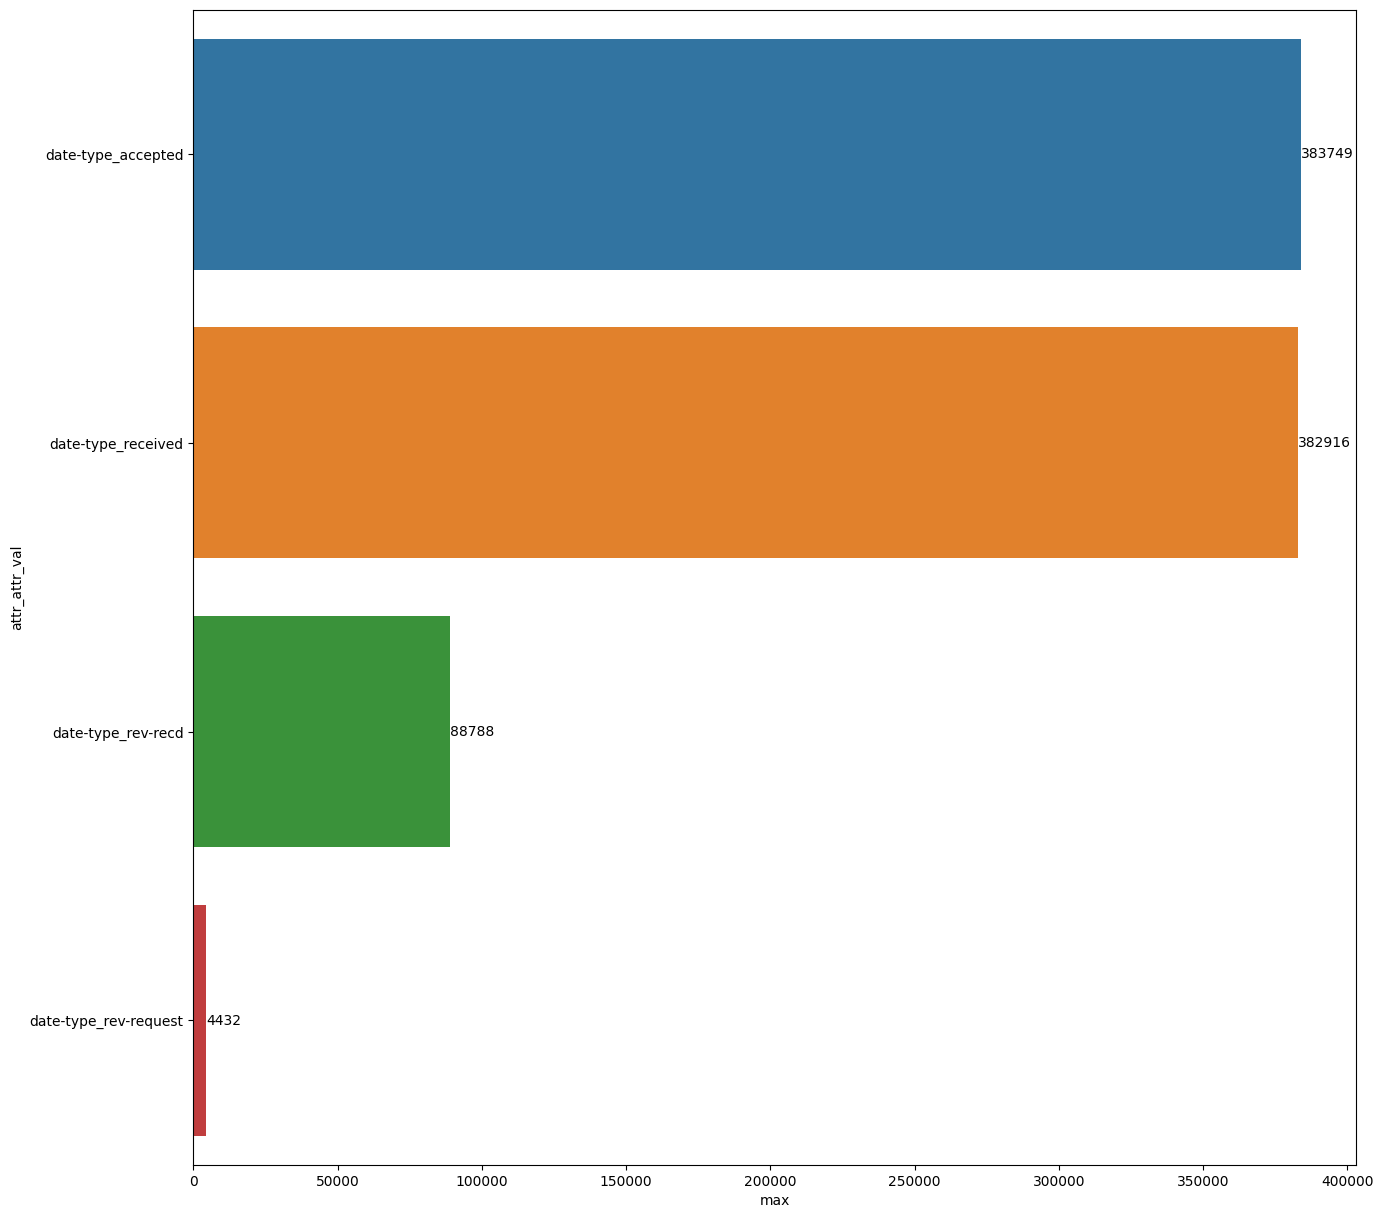

In [31]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(y=date['attr_attr_val'], x=date['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

# For the back level

In [32]:
back_type_max = df_attr[(df_attr['level'] == 'back')].groupby(['tag'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
back_type_max = back_type_max[back_type_max['max'] > max(back_type_max['max'])*0.001]
back_type_max

tag     max
66                                      pub-id  414978
63                                person-group  317103
26                            element-citation  238193
53                              mixed-citation  172971
29                                    ext-link  172132
58                                       notes  105218
67                                         ref   88663
68                                    ref-list   80207
80                      supplementary-material   62010
31                                          fn   49942
72                                         sec   35284
48                                      italic   27291
60                                           p   21958
19                            date-in-citation   19340
54                                        name   13701
52                                       media   12693
100                                       xref   11724
74                                      source    9759
86                                          td    8698
3                                          app    8476
16                                      collab    8312
59                                   object-id    8163
1                                          ack    8066
12                                    citation    6959
81                                       table    6002
34                              funding-source    5951
97                                         uri    5035
44                              institution-id    4373
90                                          th    3723
82                                  table-wrap    3504
5                                        array    3498
87                                        term    3259
50                                        list    2763
30                                         fig    2507
32                                    fn-group    2107
39                                     graphic    1382
21                                    def-list    1114
25                                     edition     923
101                                       year     766
10                                  boxed-text     761
73                                        size     692
107     {http://www.w3.org/1998/Math/MathML}mi     535
109     {http://www.w3.org/1998/Math/MathML}mo     522
14                                         col     452
110  {http://www.w3.org/1998/Math/MathML}mover     444
99                                           x     441
8                                     award-id     418
36                                    glossary     418

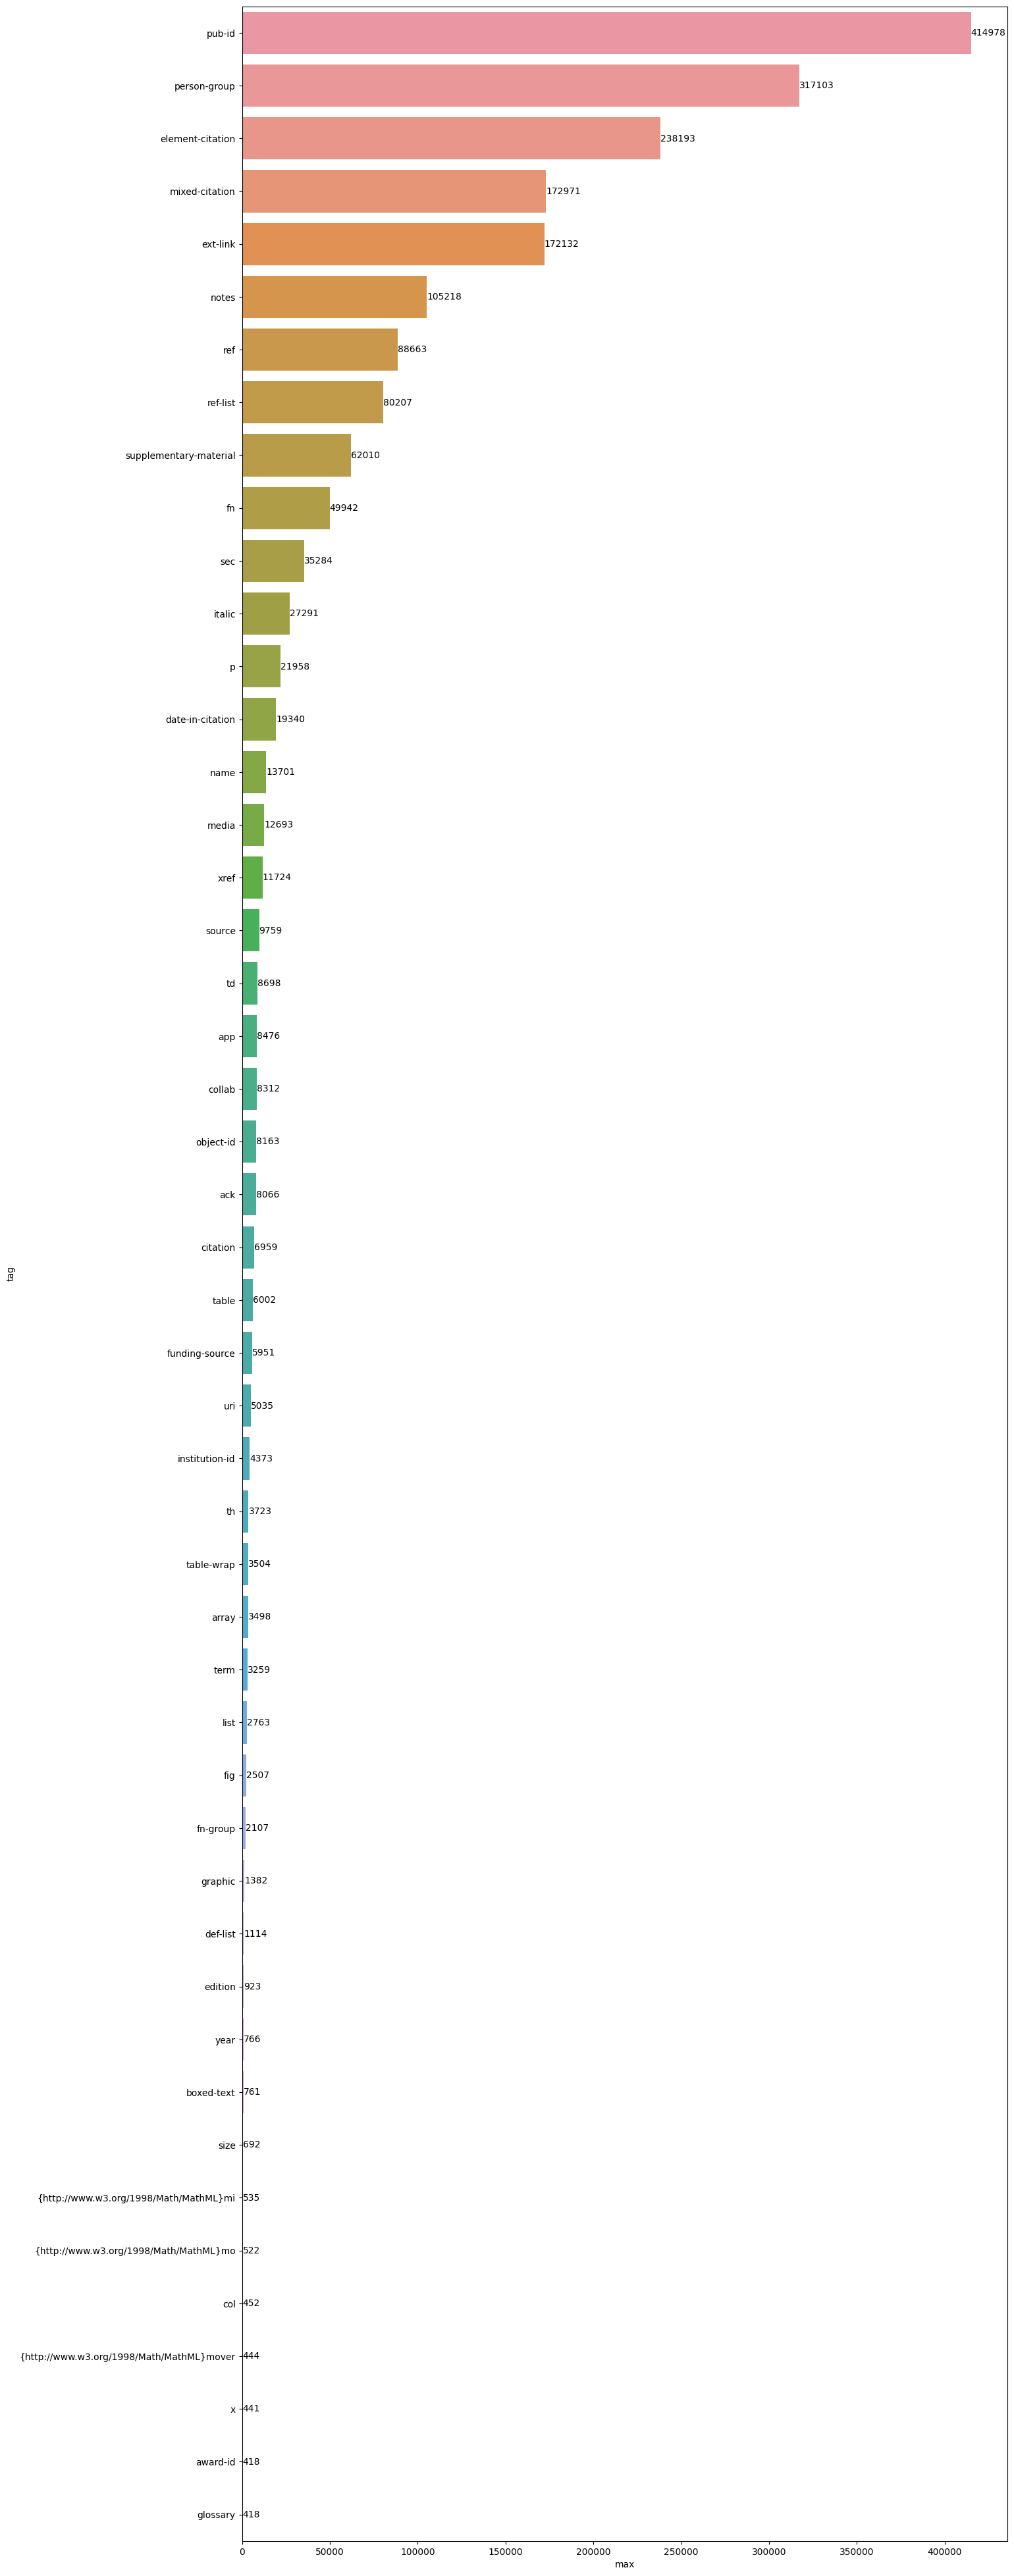

In [33]:
fig, ax = plt.subplots(figsize=(15,50))
ax = sns.barplot(y=back_type_max['tag'], x=back_type_max['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

## Attr and attr_val for pub-id

In [34]:
pub_id = df_attr[(df_attr['level'] == 'back') & (df_attr['tag'] == 'pub-id')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
pub_id = pub_id[pub_id['max'] > max(pub_id['max'])*0.001]
pub_id['attr_attr_val'] = pub_id['attr'] + '_' + pub_id['attr_val']
pub_id

attr      attr_val     max             attr_attr_val
24  pub-id-type          pmid  414978          pub-id-type_pmid
18  pub-id-type           doi  270568           pub-id-type_doi
21  pub-id-type         other   13577         pub-id-type_other
25  pub-id-type  publisher-id    7681  pub-id-type_publisher-id
20  pub-id-type       medline    3106       pub-id-type_medline
15  pub-id-type         arxiv    1467         pub-id-type_arxiv
22  pub-id-type           pii     909           pub-id-type_pii
12  pub-id-type     accession     444     pub-id-type_accession

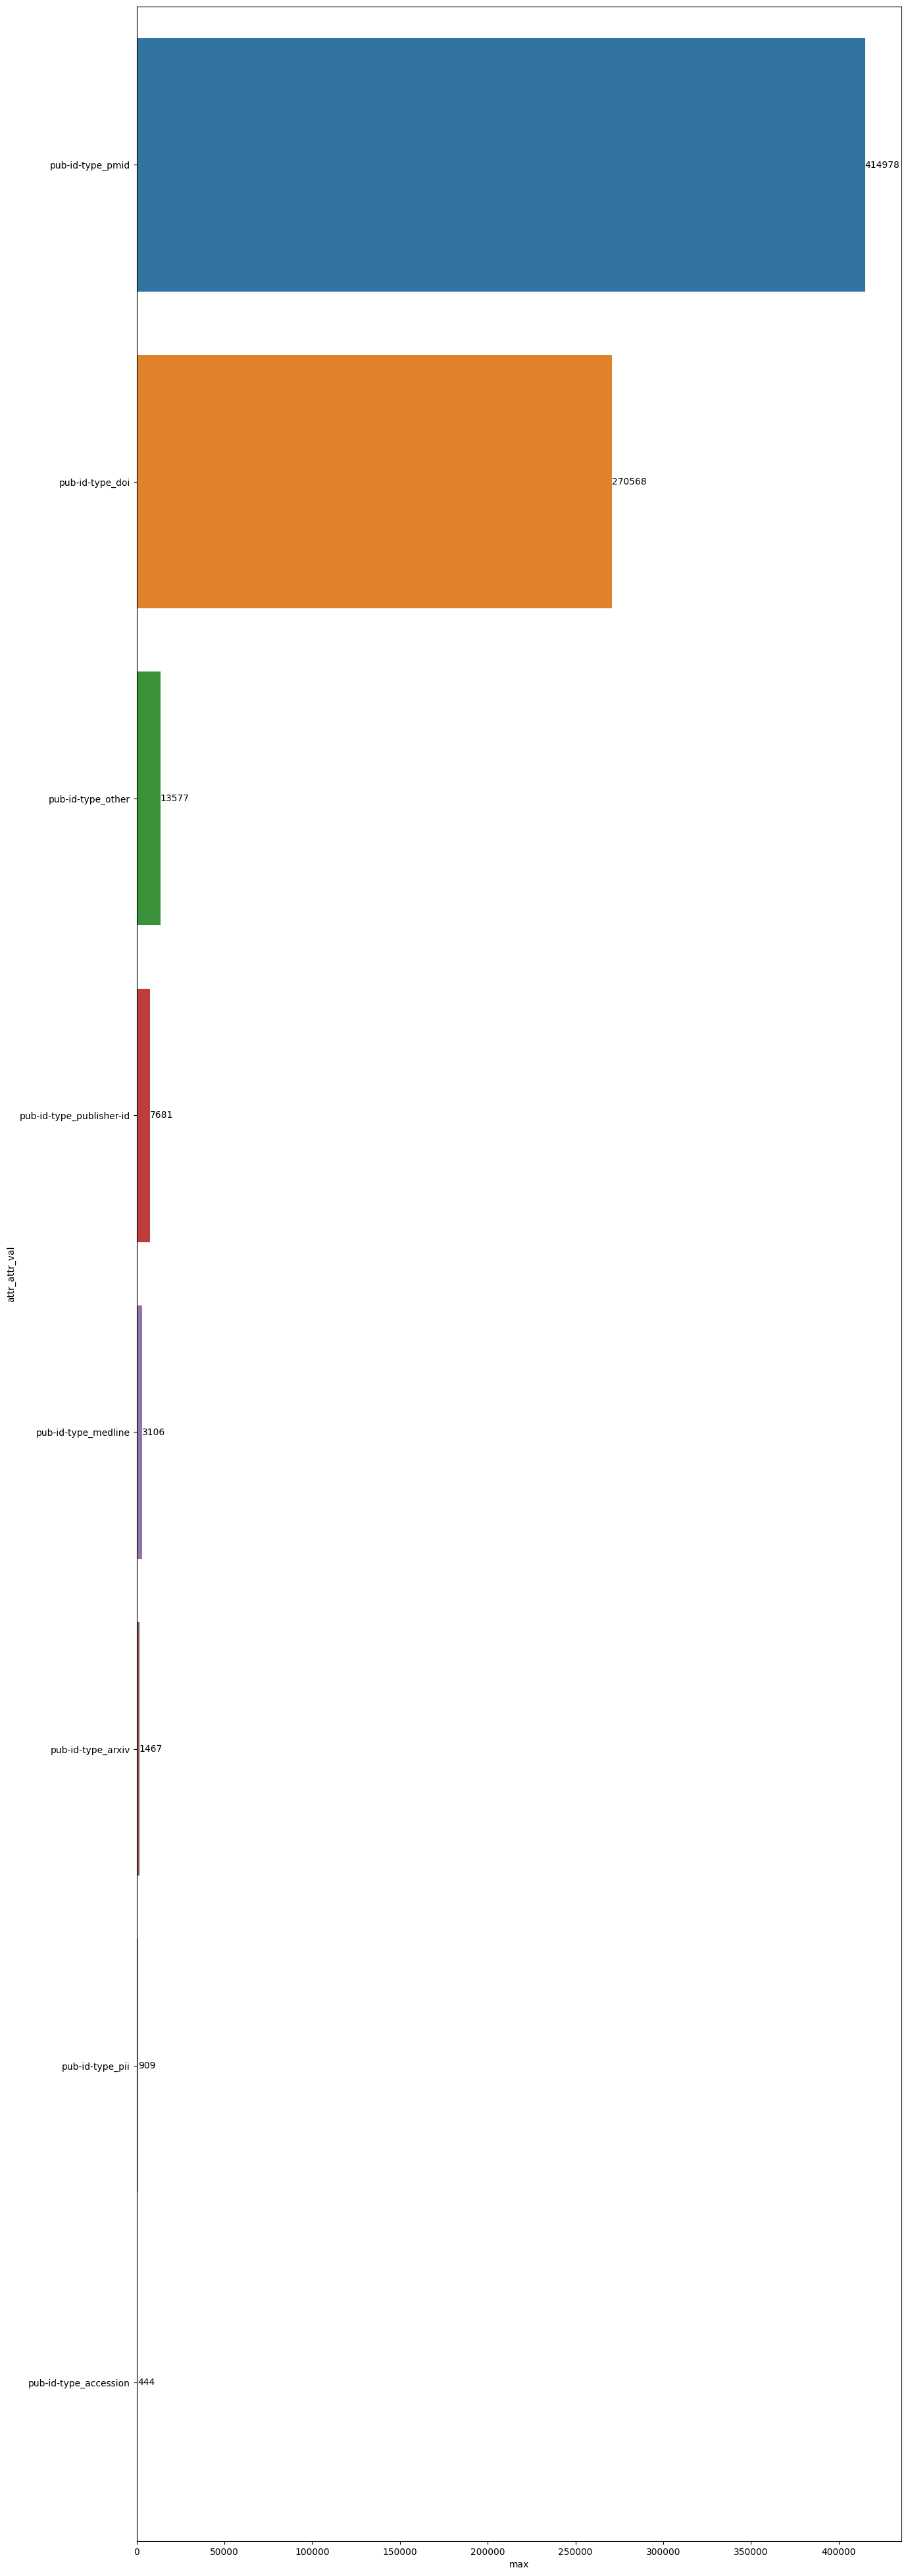

In [35]:
fig, ax = plt.subplots(figsize=(15,50))
ax = sns.barplot(y=pub_id['attr_attr_val'], x=pub_id['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

## Attr and attr_val for person-group

In [36]:
person_group = df_attr[(df_attr['level'] == 'back') & (df_attr['tag'] == 'person-group')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
person_group['attr_attr_val'] = person_group['attr'] + '_' + person_group['attr_val']
person_group

attr    attr_val     max                 attr_attr_val
2   person-group-type      author  317103      person-group-type_author
9   person-group-type      editor   58483      person-group-type_editor
0   person-group-type  allauthors     910  person-group-type_allauthors
12  person-group-type  translator     116  person-group-type_translator
11  person-group-type    inventor      63    person-group-type_inventor
5   person-group-type    compiler      59    person-group-type_compiler
13       specific-use        dash      35             specific-use_dash
6   person-group-type     curator      23     person-group-type_curator
14       specific-use          sc      11               specific-use_sc
1   person-group-type    assignee       4    person-group-type_assignee
7   person-group-type    director       3    person-group-type_director
3   person-group-type        book       2        person-group-type_book
4   person-group-type      collab       2      person-group-type_collab
8   person-group-type       edito       1       person-group-type_edito
10  person-group-type     editors       1     person-group-type_editors
15       specific-use    web-only       1         specific-use_web-only

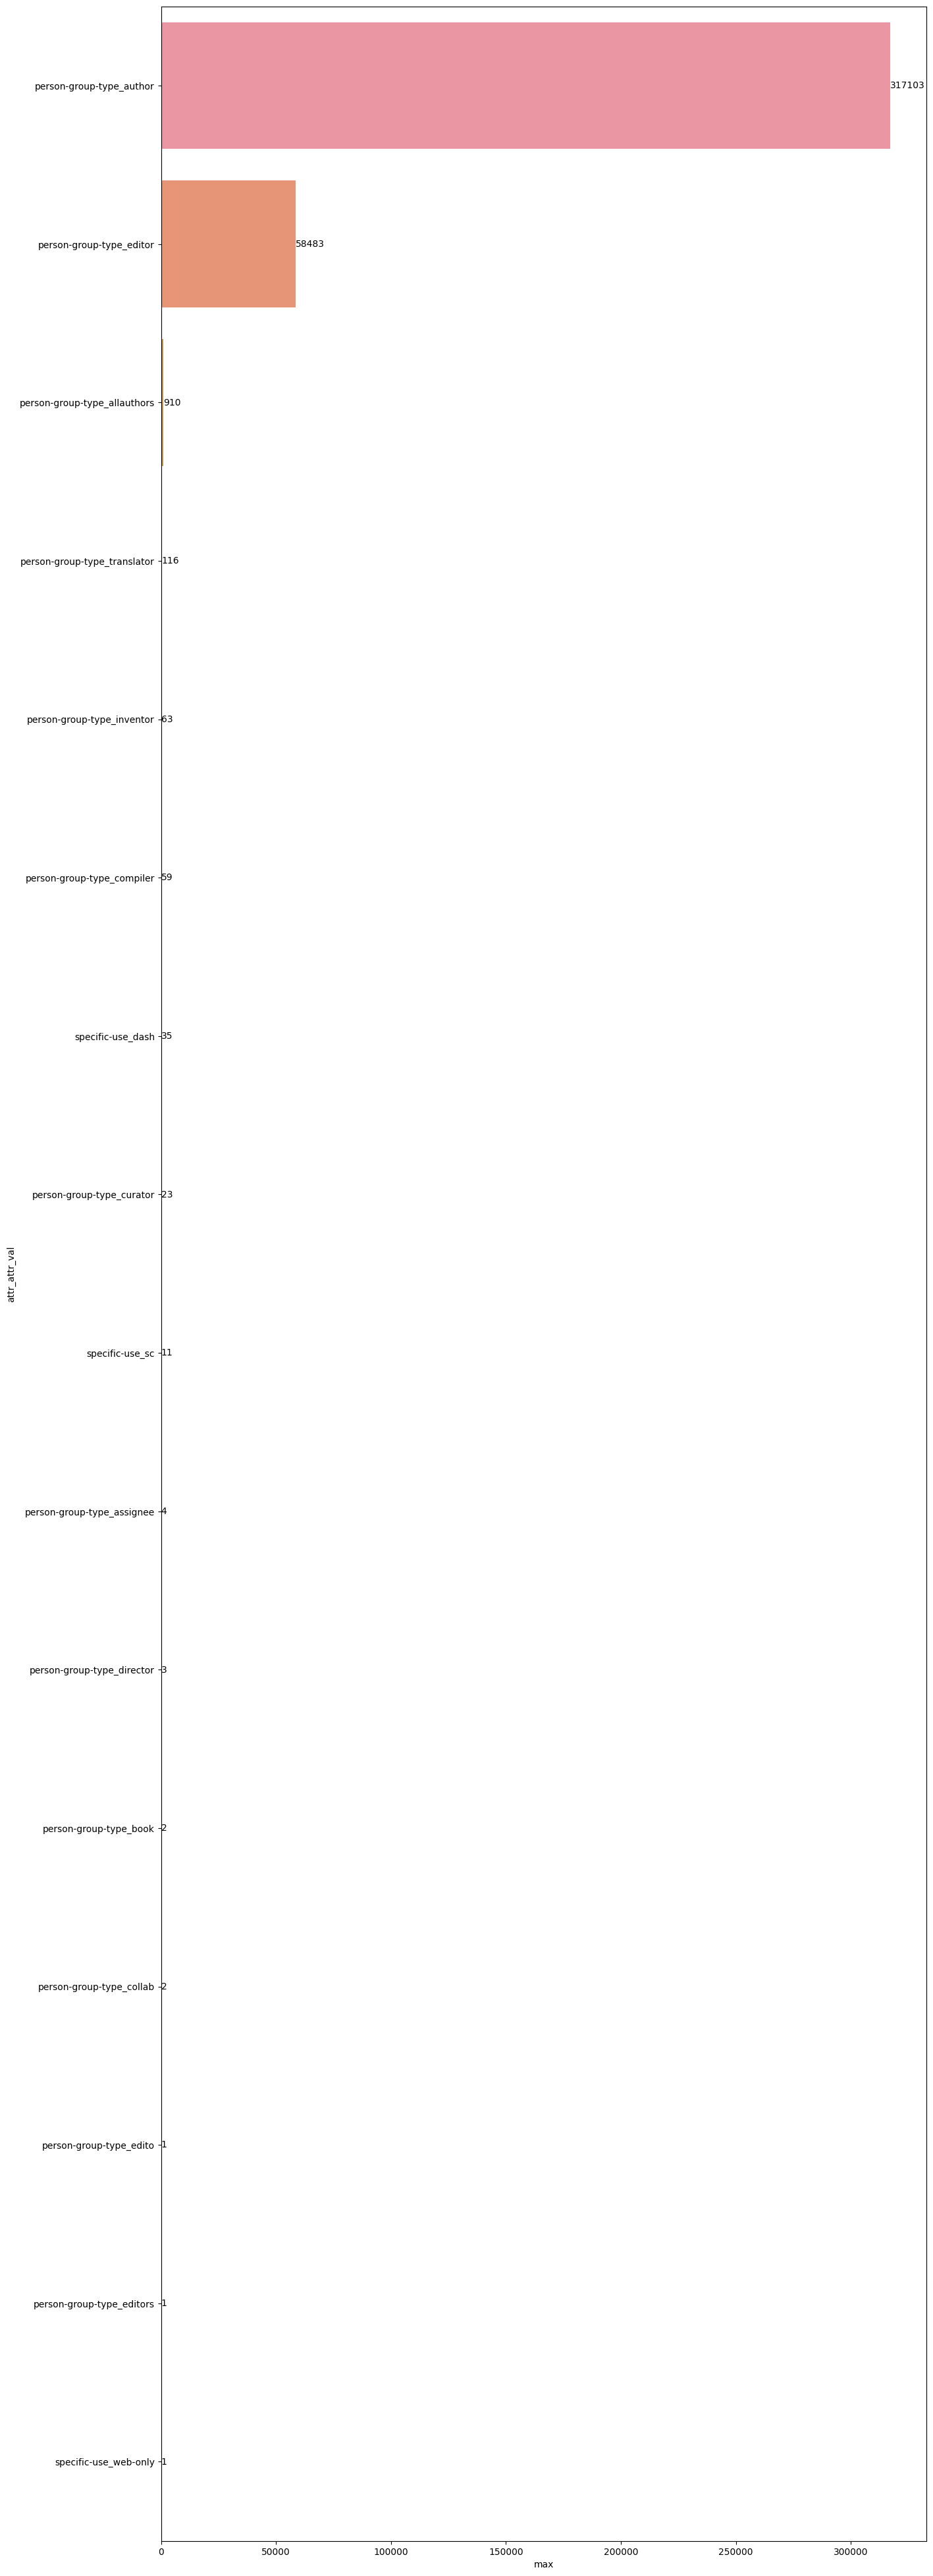

In [37]:
fig, ax = plt.subplots(figsize=(15,50))
ax = sns.barplot(y=person_group['attr_attr_val'], x=person_group['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

## Attr and attr_val for element-citation

In [42]:
element_citation = df_attr[(df_attr['level'] == 'back') & (df_attr['tag'] == 'element-citation')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
element_citation['attr_attr_val'] = element_citation['attr'] + '_' + element_citation['attr_val']
element_citation = element_citation[element_citation['max'] > max(element_citation['max'])*0.01]
element_citation

attr  attr_val     max              attr_attr_val
25330  publication-type   journal  238193   publication-type_journal
25309  publication-type      book   97489      publication-type_book
25362  publication-type   webpage   14075   publication-type_webpage
25340  publication-type     other   12351     publication-type_other
25318  publication-type  confproc   11880  publication-type_confproc
...                 ...       ...     ...                        ...
12794                id    rf0085    2486                  id_rf0085
12795                id    rf0090    2465                  id_rf0090
12796                id    rf0095    2454                  id_rf0095
24819                id    sref60    2451                  id_sref60
12846                id    rf0100    2418                  id_rf0100

[93 rows x 4 columns]

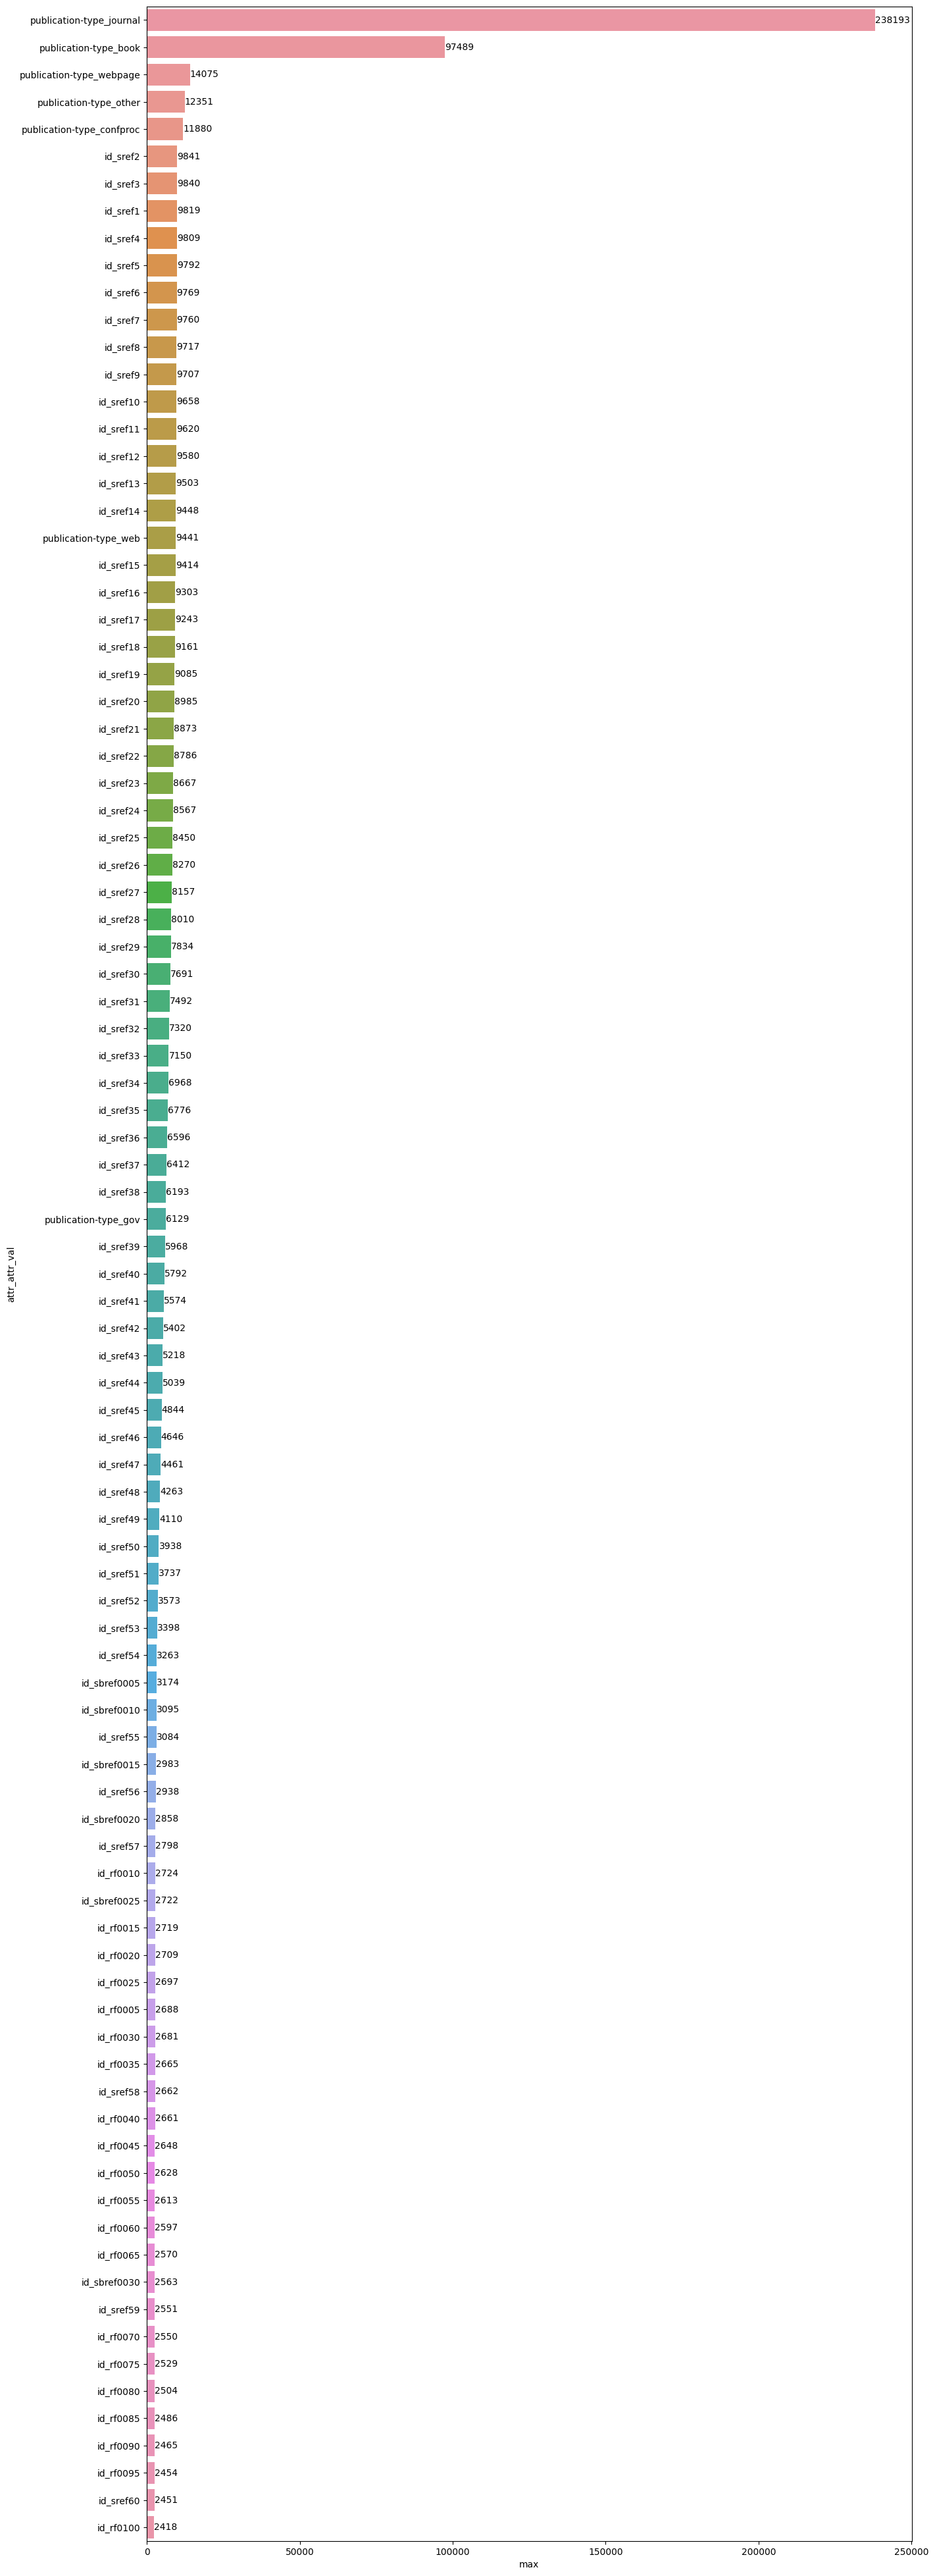

In [43]:
fig, ax = plt.subplots(figsize=(15,50))
ax = sns.barplot(y=element_citation['attr_attr_val'], x=element_citation['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

## Attr and attr_val for ref_list

In [44]:
ref_list = df_attr[(df_attr['level'] == 'back') & (df_attr['tag'] == 'ref-list')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
ref_list['attr_attr_val'] = ref_list['attr'] + '_' + ref_list['attr_val']
ref_list = ref_list[ref_list['max'] > max(ref_list['max'])*0.01]

ref_list

attr          attr_val    max                  attr_attr_val
64               id              Bib1  80207                        id_Bib1
2      content-type  cited-references  17667  content-type_cited-references
8485             id         cebib0010   9545                   id_cebib0010
5944             id            bi0005   2333                      id_bi0005
22029            id              ref1   2219                        id_ref1
8495             id           cebibl1   2154                     id_cebibl1
5946             id             bi005   1977                       id_bi005
1      content-type        authoryear   1435        content-type_authoryear
5954             id          bibl0005   1319                    id_bibl0005
22000            id                r1   1080                          id_r1
4175             id              REF1    905                        id_REF1
5958             id       bibliog0005    858                 id_bibliog0005
22039            id          reflist1    855                    id_reflist1

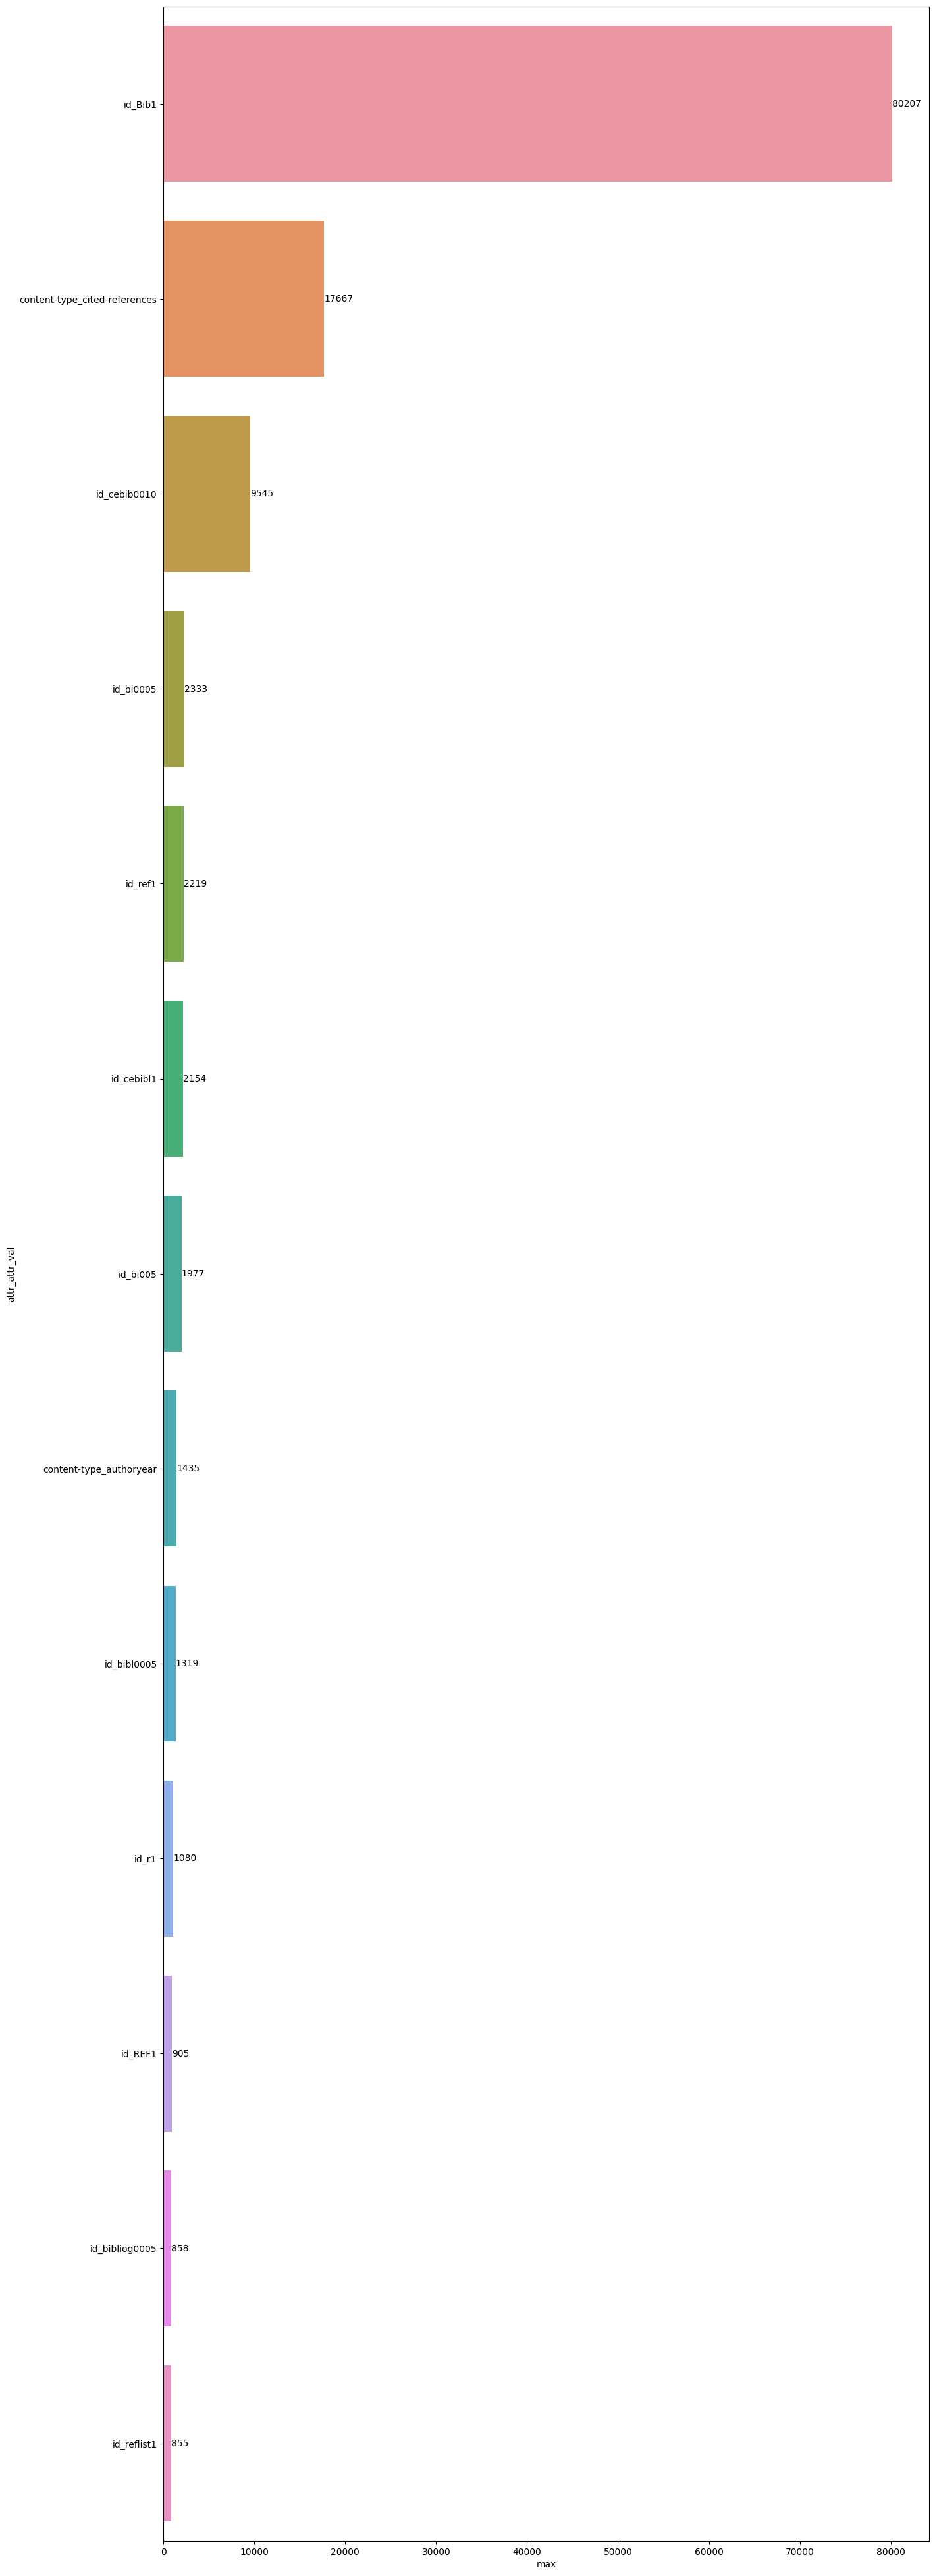

In [45]:
fig, ax = plt.subplots(figsize=(15,50))
ax = sns.barplot(y=ref_list['attr_attr_val'], x=ref_list['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()